#**BBM409: Machine Learning Laboratory**
==================================

**Programming Assignment-4**

**Instructors:** 
*   Ahmet Burak Can
*   Burçak Asal

**Prepared By:** 
* Mert Tazeoğlu `(21946606)`

**Problem Definition:** 

In this assignment, we will use Neural Network and CNN in order to handle image classification problem.

###**Table Of Contents**
---
**Part-1:** [Working With Standart Handmade Neural Network](#cell-id-1) 
*  **1.1:** [Importing Required Libraries](#cell-id-11) 
*  **1.2:** [Data Preparation and Image Processing](#cell-id-12) 
  *  **1.2.1:** [Accessing and Unzipping Dataset](#cell-id-121) 
  *  **1.2.2:** [Resizing Images In The Dataset](#cell-id-122) 
  *  **1.2.3:** [Converting Images To Gray-Level Values](#cell-id-123)
  *  **1.2.4:** [Storing Standart and Normalized (Scaled) Pixel Values](#cell-id-124)
*  **1.3:** [Implementing Required Functions](#cell-id-13) 
*  **1.4:** [Training and Testing Different Models With Different Settings](#cell-id-14)
  * **1.4.1:** [Experimenting With Single Layer Neural Network](#cell-id-141)
    * **1.4.1.1:** [Effect of Activation Function](#cell-id-1411)
    * **1.4.1.2:** [Effect of Objective Function](#cell-id-1412)
    * **1.4.1.3:** [Effect of Learning Rate](#cell-id-1413)
    * **1.4.1.4:** [Effect of Batch Size](#cell-id-1414)
    * **1.4.1.5:** [Effect of Early Stopping Function and Batch Size](#cell-id-1415)
    * **1.4.1.6:** [Neural Network Experiment Results As A Table](#cell-id-1416)
  * **1.4.2:** [Experimenting With NN Which Contains One Hidden Layer](#cell-id-142)
    * **1.4.2.1:** [Effect of Activation Function](#cell-id-1421)
    * **1.4.2.2:** [Effect of Objective Function](#cell-id-1422)
    * **1.4.2.3:** [Effect of Learning Rate](#cell-id-1423)
    * **1.4.2.4:** [Effect of Batch Size](#cell-id-1424)
    * **1.4.2.5:** [Effect of Early Stopping Function and Batch Size](#cell-id-1425)
    * **1.4.2.6:** [Neural Network Experiment Results As A Table](#cell-id-1426)
  * **1.4.3:** [Experimenting With NN Which Contains Two Hidden Layers](#cell-id-143)
    * **1.4.3.1:** [Effect of Activation Function](#cell-id-1431)
    * **1.4.3.2:** [Effect of Objective Function](#cell-id-1432)
    * **1.4.3.3:** [Effect of Learning Rate](#cell-id-1433)
    * **1.4.3.4:** [Effect of Batch Size](#cell-id-1434)
    * **1.4.3.5:** [Effect of Early Stopping Function and Batch Size](#cell-id-1435)
    * **1.4.3.6:** [Neural Network Experiment Results As A Table](#cell-id-1436)
*  **1.5:** [Neural Network Experiment Results As A Report](#cell-id-15)  

**Part-2:** [Working With VGG-19 Convolutional Neural Network](#cell-id-2)
*  **2.1:** [Importing Required Libraries](#cell-id-21) 
*  **2.2:** [Data Preparation and Image Processing](#cell-id-22) 
*  **2.3:** [Implementing Required Functions](#cell-id-23) 
*  **2.4:** [Training and Testing Different Models With Different Settings](#cell-id-24) 
  *  **2.4.1:** [Effect Of Batch Size (Experiment 1)](#cell-id-241) 
  *  **2.4.2:** [Effect Of Epoch Number (Experiment 2)](#cell-id-242) 
  *  **2.4.3:** [Effect Of Learning Rate (Experiment 3)](#cell-id-243) 
  *  **2.4.4:** [Effect Of Finetune Option (Experiment 4)](#cell-id-244) 
*  **2.5:** [VGG-19 CNN Experiment Results As A Table](#cell-id-25) 
*  **2.6:** [Using Best VGG-19 Model Options With All Data (Parameter Tuning)](#cell-id-26) 
*  **2.7:** [Visualization of Layers of Best VGG-19 Model](#cell-id-27)

<a name="cell-id-1"></a>
#**Part-1: Working With Standart Handmade Neural Network**

<a name="cell-id-11"></a>
##**1.1 - Importing Required Libraries**
*   **`Numpy:`** To perform a wide variety of mathematical operations on datasets.
*   **`Pandas:`** To analyse and manipulate tabular data in different dataframes.
*   **`Math:`** To make basic mathematical and statistical operations on dataframes.
*   **`Operator:`** To make critical dictionary operations in an easier way.
*   **`Itertools:`** To iterate and slice python dictionaries in an easier way.
*   **`Matplotlib:`** To visualize datasets and important statisctical informations.
*   **`Copy:`** To create deep copies of data structures in order to prevent conclusions.
*   **`Drive:`** To access dataset in faster way, which reduces time waste in sessions.
*   **`Os:`** To access Google Drive and checking whether dataset exists in there.
*   **`Shutil:`** To delete some folders properly in the current working directory.
*   **`Random:`** To create random numbers in a range (for neural network weigts).
*   **`Pickle:`** To save and store trained neural network (dictionary) as a file.

In [1]:
import numpy as np
import pandas as pd
import math
from time import time
import operator
import itertools
import matplotlib.pyplot as plt
import copy
from google.colab import drive
import os
from os.path import exists
import shutil
from PIL import Image
from random import seed
from random import random
from six.moves import cPickle as pickle
from __future__ import print_function

<a name="cell-id-12"></a>
##**1.2 - Data Preparation and Image Processing**

**`Important Warning:`** Datafile which is named as `Vegetable Images.zip` must be uploaded in the Google Drive. Otherwise, uploading it to colab again and again wastes quite much time.

<a name="cell-id-121"></a>
###**1.2.1 - Accessing and Unzipping Dataset**
First of all, we should access the dataset and make it ready for processing in an optimized way.


In [2]:
# Part-1: Deleting the dataset folder if it exists in current working directory
try: shutil.rmtree("Vegetable Images")
except: pass
# Required in order to save time while developing the project

# Part-2: Accessing the Google Drive
drive.mount('/content/drive')
print("")

# Part-3: Checking whether dataset exists in Google Drive
if os.path.isfile("/content/drive/MyDrive/Vegetable Images.zip") == False:
  print("Error: File doesn't exist or failed to connect to Google Drive!")
  print("")

# Part-4: Unzipping whole dataset
!unzip "/content/drive/MyDrive/Vegetable Images.zip"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/train

<a name="cell-id-122"></a>
###**1.2.2 - Resizing Images In The Dataset**
*   In order to the machine learning algorithm to work correctly, the images must be the same size but since all images are not the same size in our dataset, a resizing operation is required.
*   If the image sizes are too large, the working time of the machine learning algorithms will increase significantly and if the image sizes are too small, the working accuracy of the machine learning algorithms will decrease due to data loss. Therefore care should be taken in the sizing process.


In [3]:
# Part-1: Creating a debugger in order to check whether our function works properly
print("******* Debugger for Image Compression *******")
print("Test File Name: Vegetable Images/train/Potato/0001.jpg")
print("")
print("--- 1- Before Image Compression ---")
test_image = Image.open("Vegetable Images/train/Potato/0001.jpg", "r")
old_width, old_height = test_image.size
print("Old Width: " + str(old_width) + " - Old Height: " + str(old_height))
print("")

df_types = ['train', 'validation', 'test']

# Part-2: Selecting all folders (train, test, validation)
for df_type in range(len(df_types)):

  # Part-3: Selecting all subfolders of main folders (bean, broccoli etc.)
  for subfolder in (os.listdir("Vegetable Images/" + df_types[df_type])):

    # Part-4: Selecting all images in subfolders (0001.jpg, 0002.jpg etc.)
    for file in (os.listdir("Vegetable Images/" + df_types[df_type] + "/" + subfolder)):

      # Part-4.1: Opening the image
      image = Image.open("Vegetable Images/" + df_types[df_type] + "/" + subfolder + "/" + file)

      # Part-4.2: Resizing image and storing it
      newsize = (128, 128) 
      image = image.resize(newsize)
      image.save("Vegetable Images/" + df_types[df_type] + "/" + subfolder + "/" + file)

# Part-5: Comparing old and new size values
test_image = Image.open("Vegetable Images/train/Potato/0001.jpg", "r")
new_width, new_height = test_image.size
print("--- 2- After Image Compression ---")
print("New Width: " + str(new_width) + " - New Height: " + str(new_height))
print("")
if old_width != new_width: print("Result: Image compression is successfully completed!")
else: print("Result: Image compression is failed!")

******* Debugger for Image Compression *******
Test File Name: Vegetable Images/train/Potato/0001.jpg

--- 1- Before Image Compression ---
Old Width: 224 - Old Height: 224

--- 2- After Image Compression ---
New Width: 128 - New Height: 128

Result: Image compression is successfully completed!


<a name="cell-id-123"></a>
###**1.2.3 - Converting Images To Gray-Level Values**
Converting images from RGB to grayscale format is important. Because by this process we reduce color complexity, noise, code complexity. Also by this way learning image processing, applying visualization and code execution becomes easier.

In [4]:
# Part-1: Creating a debugger in order to check whether our function works properly
print("******* Debugger for Image Convertion *******")
print("Test File Name: Vegetable Images/train/Potato/0001.jpg")
print("")
print("--- 1- Before Image Convertion ---")
test_image = Image.open("Vegetable Images/train/Potato/0001.jpg", "r")
pix_val = list(test_image.getdata())
old_pix_val = pix_val[0]
print("Old Pixel Values: " + str(pix_val))
print("")

df_types = ['train', 'validation', 'test']

# Part-2: Selecting all folders (train, test, validation)
for df_type in range(len(df_types)):

  # Part-3: Selecting all subfolders of main folders (bean, broccoli etc.)
  for subfolder in (os.listdir("Vegetable Images/" + df_types[df_type])):

    # Part-4: Selecting all images in subfolders (0001.jpg, 0002.jpg etc.)
    for file in (os.listdir("Vegetable Images/" + df_types[df_type] + "/" + subfolder)):

      # Part-4.1: Opening the image
      image = Image.open("Vegetable Images/" + df_types[df_type] + "/" + subfolder + "/" + file)

      # Part-4.2: Converting image and storing it
      image = image.convert("L")
      image.save("Vegetable Images/" + df_types[df_type] + "/" + subfolder + "/" + file)

# Part-5: Comparing old and new pixel values
test_image = Image.open("Vegetable Images/train/Potato/0001.jpg", "r")
pix_val = list(test_image.getdata())
new_pix_val = pix_val[0]
print("--- 2- After Image Convertion ---")
print("New Pixel Values: " + str(pix_val))
print("")

if old_pix_val != new_pix_val: print("Result: Image convertion is successfully completed!")
else: print("Result: Image convertion is failed!")

******* Debugger for Image Convertion *******
Test File Name: Vegetable Images/train/Potato/0001.jpg

--- 1- Before Image Convertion ---
Old Pixel Values: [(40, 32, 19), (44, 36, 23), (49, 39, 27), (52, 43, 28), (55, 43, 27), (58, 45, 28), (63, 48, 29), (66, 49, 29), (68, 50, 28), (73, 51, 28), (77, 53, 27), (80, 54, 29), (83, 57, 30), (85, 58, 29), (86, 59, 30), (88, 59, 29), (85, 64, 33), (86, 65, 34), (86, 65, 34), (87, 66, 35), (87, 66, 35), (86, 65, 34), (86, 65, 34), (85, 64, 33), (87, 66, 35), (87, 66, 35), (87, 66, 35), (87, 66, 35), (87, 66, 35), (87, 66, 35), (87, 66, 35), (87, 66, 35), (90, 65, 34), (90, 65, 34), (90, 65, 34), (90, 65, 34), (90, 65, 34), (90, 65, 34), (90, 65, 34), (90, 65, 34), (91, 66, 35), (91, 66, 35), (91, 66, 35), (91, 66, 35), (91, 66, 35), (91, 66, 35), (91, 66, 35), (91, 66, 35), (90, 65, 34), (90, 65, 34), (90, 65, 34), (90, 65, 34), (90, 65, 34), (90, 65, 34), (90, 65, 34), (90, 65, 34), (92, 67, 36), (92, 67, 36), (92, 67, 36), (92, 67, 36), (92,

<a name="cell-id-124"></a>
###**1.2.4 - Storing Normalized (Scaled) Pixel Values**
Since there is no obligation to store the pixel values of the images in the csv file, we can store them (and their normalized values) directly in a dictionary data structures.


In [5]:
normalized_images = {}

df_types = ['train', 'validation', 'test']

# Part-1: Selecting all folders (train, test, validation)
for df_type in range(len(df_types)):

  main_folder2 = {}

  # Part-2: Selecting all subfolders of main folders (bean, broccoli etc.)
  for subfolder in (os.listdir("Vegetable Images/" + df_types[df_type])):

    sub_folder2 = {}

    # Part-3: Selecting all images in subfolders (0001.jpg, 0002.jpg etc.)
    for file in (os.listdir("Vegetable Images/" + df_types[df_type] + "/" + subfolder)):
      pass

      # Part-4.1: Opening the image
      image = Image.open("Vegetable Images/" + df_types[df_type] + "/" + subfolder + "/" + file)

      # Part-4.2: Storing pixel values of the image
      np_image = np.asarray(image)
      pixels = np_image.astype('float32')
      sub_folder2[file] = pixels/255

    main_folder2[subfolder] = sub_folder2

  normalized_images[df_types[df_type]] = main_folder2

<a name="cell-id-13"></a>
##**Part-1.3: Implementing Required Functions**

*   **`Data Preparator:`** This function converts precalcultated image dictionaries into easily computable numpy arrays forms for ML.

*   **`Neural Network Initializer:`** This function creates a neural network with input, hidden and output layers with random weights.

*   **`Neuron Activation Calculator:`** This function calculates activation values of neurons with three different function options (sigmoid, tanh, relu). In order to get detailed information about this function, you can take a look at page 10 in [1].

*   **`Neuron Activation Transferer:`** This function transfers neurons activation values between layers with applying a feed-forward process. In order to get detailed information about this function, you can take a look at page 12, 13, 14 in [1].

*   **`Forward Propagater:`** This function feeds the network in the forward direction (in other words left to right in classical scheme) through the network. In order to get detailed information about this function, you can take a look at page 30 in [1]. In that function, all of the outputs from one layer become inputs to the neurons on the next layer. And function returns last (output) layer.

*   **`Derivative Calculator:`** This function calculates derivative (in other words slope) of the error against the non linear activation function. Although loss functions can be compilated (one of the main functions can be found in page 28 in reference of [1]), derivatives of them are quite simple and proofs of derivatives can be found in [2], [4] and [5].

*   **`Backward Propagater:`** This function tries to reduce errors from output to input (in other words right to left in classical scheme). It looks for the minimum value of the error function in the weight field using a technique called gradient descent. Also this error values are stored in neurons. In order to get detailed information about this function, you can take a look at pages from 31 to 40 in [1] and reference of [3].

*   **`Network Updater:`** This function updates neuron weights in network with using error values after backpropagation for given sample.

*   **`Prediction Maker:`** This function returns the index of most probable class for given sample after making a forward propagation.

*   **`Error Calculator:`** This function calculates error with loss function. In order to get detailed information about this activation and loss functions, you can take a look at reference of [6]. I implemented most of functions that used in reference of [6]. Also formulas and detailed information about negative-log likelihood function can be found in references [7] and [8].

*   **`Network Trainer:`** This function creates and trains neural network with given constraints (for example fixed number of epochs, learning rate, output size, error function, permission to early stop function etc.) Also implementation of this function provides reproducibility, in other words you can create n-layer neural networks and learn the classifier with just changing function parameters.

*   **`Model Evaluator:`** This function prints a (class_size x class_size) confusion matrix and then measures model's performance on test set with respect to the fundamental performance metrics (Accuracy, Precision, Recall, F1-Score) with using created confusion matrix. On the other hand, this function plots train and test error curves due to change of epoch.

###**About Neural Network Data Structure:**

Neural network data structure is nested dictionary. Main there keys of dictionary are:

• **Weights** -> Weight value of neurons in the layer

• **Output ->** Output value of neurons in the layer after activation (weight * value)

• **Error ->** Error signal of neurons in the layer calculated after back propagation

###**References:**
1. https://web.cs.hacettepe.edu.tr/~abc/teaching/bbm406/slides/NeuralNets.pdf
2. https://math.stackexchange.com/questions/2623822/how-to-get-the-loss-function-derivative
3. https://devhunteryz.wordpress.com/2018/06/20/geri-yayilimbackpropagation/
4. https://socratic.org/questions/what-is-the-derivative-of-tanh-x
5. https://stats.stackexchange.com/questions/333394/what-is-the-derivative-of-the-relu-activation-function
6. https://medium.com/analytics-vidhya/activation-functions-and-loss-functions-for-neural-networks-how-to-pick-the-right-one-542e1dd523e0
7. https://towardsdatascience.com/cross-entropy-negative-log-likelihood-and-all-that-jazz-47a95bd2e81
8. https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/


In [6]:
def data_preparator(pixel_values, LIMIT_NUMBER, class_list):
  # Step-1: Initializing splitted datasets
  trainSet = list()
  validationSet = list()
  testSet = list()
  checker_train, checker_val, checker_test = 0, 0, 0
  # Step-2: Selecting each value in dictionaries
  for df_type in(list(pixel_values.keys())):
    for vegetable_type in list(pixel_values[df_type].keys()):
      if (df_type == 'train'): class_limit = (LIMIT_NUMBER*3)/(15*5)
      if (df_type == 'validation'): class_limit = LIMIT_NUMBER/(15*5)
      if (df_type == 'test'): class_limit = LIMIT_NUMBER/(15*5)
      cherker_class = 0
      for instance in list(pixel_values[df_type][vegetable_type].keys()):
        # Step-3: Storing file name in first column, type in last column and pixel values in other columns
        cherker_class += 1
        if (df_type == 'train' and checker_train < LIMIT_NUMBER*3/5 and cherker_class < class_limit):
          data = np.array([]).astype(float)
          #data = np.append(data, instance) # Column 1 = Name
          data = np.append(data, pixel_values[df_type][vegetable_type][instance].astype(float)) # Column 2 = Pixel Values
          data = np.append(data, vegetable_type) # Column 3 = Type 
          trainSet.append(list(data))
          checker_train += 1
        elif (df_type == 'validation' and checker_val < LIMIT_NUMBER/5 and cherker_class < class_limit):
          data = np.array([]).astype(float)
          #data = np.append(data, instance) # Column 1 = Name
          data = np.append(data, pixel_values[df_type][vegetable_type][instance].astype(float)) # Column 2 = Pixel Values
          data = np.append(data, vegetable_type) # Column 3 = Type 
          validationSet.append(list(data))
          checker_val += 1
        elif (df_type == 'test' and checker_test < LIMIT_NUMBER/5 and cherker_class < class_limit):
          data = np.array([]).astype(float)
          #data = np.append(data, instance) # Column 1 = Name
          data = np.append(data, pixel_values[df_type][vegetable_type][instance].astype(float)) # Column 2 = Pixel Values
          data = np.append(data, vegetable_type) # Column 3 = Type 
          testSet.append(list(data))          
          checker_test += 1
        
  # Step-4: Last preparations (handing possible errors due to type differences)
  trainSet = np.array(trainSet)
  validationSet = np.array(validationSet)
  testSet = np.array(testSet)
  for j in range(len(class_list)):
    trainSet[trainSet == class_list[j]] = int(j)
    validationSet[validationSet == class_list[j]] = int(j)
    testSet[testSet == class_list[j]] = int(j)

  trainSet = trainSet.astype(float)
  validationSet = validationSet.astype(float)
  testSet = testSet.astype(float)

  # Step-5: Converting them to numpy array and returning them
  # Note: In order to add lists in list, we started with original Python lists and we converted them to numpy array at the end.
  return np.array(trainSet), np.array(validationSet), np.array(testSet)

def initialize_neural_network(input_layer_item_count, hidden_layer_item_count, output_layer_item_count, hidden_layer_count):
  # Step-1: Initializing neural network
  neural_network = list()
  # Step-2: Adding input layer
  input_layer = [ {'weights': [random() for i in range(input_layer_item_count + 1)]} for i in range(hidden_layer_item_count) ]
  neural_network.append(input_layer)
  # Step-3: Adding 'hidden_layer_count' of hidden layers
  for i in range(hidden_layer_count):
    hidden_layer = [ {'weights': [random() for i in range(hidden_layer_item_count + 1)]} for i in range(hidden_layer_item_count) ]
    neural_network.append(hidden_layer)
  # Step-4: Adding output layer and returning the neural network
  output_layer = [ {'weights': [random() for i in range(hidden_layer_item_count + 1)]} for i in range(output_layer_item_count) ]
  neural_network.append(output_layer)
  return neural_network

def calculate_neuron_activation(activation_value, activation_type="sigmoid"):
  # Goal: Calculating and returning activation values of neurons
  if activation_type=="sigmoid": return 1.0 / (1.0 + math.exp(-activation_value)) # Sigmoid Function
  if activation_type=="tanh": return math.tanh(activation_value) # Tanh Function
  #if activation_type=="softmax": return np.exp(activation_value)/sum(np.exp(activation_value)) # Softmax Fucntion:
  else: return max(0, activation_value) if activation_value >= 0 else min(0, (-0.1 * activation_value)) # Leaky ReLU Function

def transfer_neuron_activation(weights, inputs):
  # Goal: Transferring neurons values with feed-forward process
  activation_value = weights[-1]
  for i in range(len(weights)-1): activation_value += weights[i] * inputs[i]
  return activation_value

def forward_propagate(network, row, activation_type):
  # Step-1: Iterating through whole layers and neurons in layers
  inputs = row
  for layer in network: 
    new_inputs = []
    for neuron in layer: 
      # Step-2: Calculating activation value of current neuron
      activation = transfer_neuron_activation(neuron['weights'], inputs)
      neuron['output'] = calculate_neuron_activation(activation, activation_type)
      new_inputs.append(neuron['output'])
    # Step-3: Setting next layers values as pre-calculated activation values
    inputs = new_inputs
  # Step-4: Returning the last layer (output layer)
  return inputs

def calc_derivative(output, activation_type):
  # Goal: Calculating the derivative of the error against the non linear activation function
  if activation_type=="sigmoid": return (output * (1.0 - output))
  # Sigmoid Function: Mathematical proof of it's derivative is included at references at top. [2]
  if activation_type=="tanh": return (1.0 - (math.tanh(output) * math.tanh(output)))
  # Tanh Function: Mathematical proof of it's derivative is included at references at top. [4]
  else: return 1.0 if output >= 0 else 0.1
  # ReLU Function: Mathematical proof of it's derivative is included at references at top. [5]

def backward_propagate(network, expected, activation_type):
  # Goal: Looking for the minimum value of the error function in the weight domain with using delta rule or gradient descent technique.
  # Step-1: Moving from output to input side
  for i in reversed(range(len(network))):
    current_layer = network[i]
    errors = list()
    # Step-2: Calculating the error values for each of neuron in the hidden layer(s)
    if i != len(network)-1:
      # Step-2.1: Selecting each of neurons in each of layers (except output layer)
      for j in range(len(current_layer)):
        error = 0.0
        # Step-2.2: Calculting the error for the current neuron with using jth neuron in the next layer and weight that connects the kth neuron to the current neuron
        for neuron in network[i + 1]:
          error += (neuron['weights'][j] * neuron['error'])
        errors.append(error)
    # Step-3: Calculating the error values for each of neuron in the output layer
    else:
      for j in range(len(current_layer)):
        neuron = current_layer[j]
        errors.append(neuron['output'] - expected[j])
    # Step-4: Updating the backpropagation error values with combining calculated values and gradient descent (slope)
    for k in range(len(current_layer)):
      neuron = current_layer[k]
      neuron['error'] = errors[k] * calc_derivative(neuron['output'], activation_type) # Errors[j] => what we calculated at the top

def update_network_weights(network, sample, learning_rate):
  # Goal: Updating network weights with error after backpropagation
  # Step-1: Moving from input to output side
  for i in range(len(network)):
    inputs = sample[:-1]
    # Step-2: Selecting hidden layers and output layer
    if i != 0: inputs = [neuron['output'] for neuron in network[i - 1]]
    # Step-3: Updating neuron weights with using given parameters for given training sample
    for neuron in network[i]:
      for j in range(len(inputs)):
        try: # Required in some cases
          neuron['weights'][j] -= learning_rate * neuron['error'] * inputs[j]
          neuron['weights'][-1] -= learning_rate * neuron['error']
        except: pass

def make_prediction(network, sample, activation_type):
  # Goal: After makine a forward propagataion, returning index of most probable class option
  predictions = forward_propagate(network, sample, activation_type)
  return predictions.index(max(predictions))
  
def calculate_error(expected, outputs, lossFunctionType):
  # Goal: Calculating error with using different loss (objective) functions.
  sum_error = 0
  if lossFunctionType == "MSE": # Mean Square Error
    sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
    sum_error /= len(expected)
  elif lossFunctionType == "MAE": # Mean Absolute Error
    sum_error += sum([(expected[i]-outputs[i]) for i in range(len(expected))])
    sum_error /= len(expected)
  elif lossFunctionType == "BCE": # Binary Cross Entropy
    sum_error += sum([(expected[i] * math.log(outputs[i])) for i in range(len(expected))])
    sum_error /= ((-1) * len(expected))
  elif lossFunctionType == "CEL": # Cross Entropy Loss
    for i in range(len(expected)):
      if(expected[i] == outputs[i]):
        sum_error += -np.log(outputs[i]/10)
      else: sum_error += -np.log(1 - (outputs[i]/10))
  else: # Negative Log Likelihood
    try: sum_error += sum([((expected[i] * math.log(outputs[i])) + ((1-expected[i]) * (math.log (1-outputs[i])))) for i in range(len(expected))])
    except: pass # Try-except is required in order to prevent math domain error
    sum_error *= (-1)
  return sum_error

def getAccuracy(actual,predicted):
  # Calculate accuracy for a set (copy pasted from model_evaluator method)
  # Required for plotting values in each epoch
  accuracy = 0.0

  for i in range(len(actual)):
    for j in range(len(class_list)):
      if actual[i] == class_list[j]: actual[i] = j
      if predicted[i] == class_list[j]: predicted[i] = j

  confusion_matrix = []
  for i in range(15):
    sub = [0]
    for j in range(14):
      sub.append(0)
    confusion_matrix.append(sub)
  
  for i in range(len(actual)):
    try:
      if(actual[i] == predicted[i]):
        confusion_matrix[int(actual[i])][int(actual[i])] += 1 
      elif(actual[i] != predicted[i]):
        confusion_matrix[int(actual[i])][int(predicted[i])] += 1
    except: pass

  positive = 0.0
  for i in range(15):
    if(confusion_matrix[i][i] > 0):
      positive += confusion_matrix[i][i]
  accuracy = positive / float(len(actual))

  return accuracy

def train_network(network, trainset, validationset, testset, learning_rate, number_of_epoch, number_of_output, activation_type, errorType="MSE", willEarlyStop=False):  
  # Step-1: Defining important variables for early stopping method
  willContinue = True
  epoch_number = np.array([])
  train_error = np.array([])
  test_error = np.array([])
  validation_error = np.array([])
  train_accuracy_list = []
  test_accuracy_list = []
  validation_accuracy_list = []
  sum_validation_error_before = 0 # Validation error in nth epoch while calculating validation error in (n+1)th epoch
  validation_accuracy_before = 0.00
  starting_time = time()

  # Step-2: Changing epoch numbers
  for epoch in range(number_of_epoch):
    sum_train_error = 0
    sum_validation_error = 0
    sum_test_error = 0
    train_accuracy = 0.00
    validation_accuracy = 0.00
    test_accuracy = 0.00

    # Step-3: Calculating training, validation and test errors in each epoch if model not tends to overfit
    if(willContinue):

      # Step-3.1: Calculating test error before making backward propagation and weight updation operations for training set
      test_predictions = []
      for sample in testset:
        outputs = forward_propagate(network, sample, activation_type)
        expected = [0 for i in range(number_of_output)]
        expected[int(sample[-1])-1] = 1
        test_predictions.append(outputs.index(max(outputs))) 
        sum_test_error += calculate_error(expected, outputs, errorType)
      actual = np.array(list([row[-1] for row in testset]))
      test_accuracy = getAccuracy(actual,test_predictions)

      # Step-3.2: Calculating validation error before making backward propagation and weight updation operations for training set
      validation_predictions = []
      for sample in validationset:
        outputs = forward_propagate(network, sample, activation_type)
        expected = [0 for i in range(number_of_output)]
        expected[int(sample[-1])-1] = 1
        validation_predictions.append(outputs.index(max(outputs))) 
        sum_validation_error += calculate_error(expected, outputs, errorType)
      actual = np.array(list([row[-1] for row in validationset]))
      validation_accuracy = getAccuracy(actual,validation_predictions)

      train_predictions = []
      # Step-3.3: Calculating train error before making backward propagation and weight updation operations for training set
      for sample in trainset:
        outputs = forward_propagate(network, sample, activation_type)
        expected = [0 for i in range(number_of_output)]
        expected[int(sample[-1])-1] = 1
        sum_train_error += calculate_error(expected, outputs, errorType)
        backward_propagate(network, expected, activation_type)
        update_network_weights(network, sample, learning_rate)
        train_predictions.append(outputs.index(max(outputs))) 
      actual = np.array(list([row[-1] for row in trainset]))
      train_accuracy = getAccuracy(actual,train_predictions)

      # Step-3.4: Storing important values in order to plot them in model evaluation step
      epoch_number = np.append(epoch_number, epoch)
      train_error = np.append(abs(train_error), sum_train_error)
      validation_error = np.append(abs(validation_error), sum_validation_error)
      test_error = np.append(abs(test_error), sum_test_error)
      if((epoch+1) % 10 == 0): 
        sum_validation_error_before = sum_validation_error # This is not for plotting, this is stored for early stopping
        validation_accuracy_before = validation_accuracy
      test_accuracy_list.append(test_accuracy)
      validation_accuracy_list.append(validation_accuracy)
      train_accuracy_list.append(train_accuracy)

      # Step-3.5: Printing logs in each of epochs
      print('--> Epoch = {}, Train Loss = {:.2f}, Train Accuracy = {:.2f}, Validation Loss = {:.2f}, Validation Accuracy = {:.2f}, Execution Time: {:.2f} sec.'.format(epoch+1, sum_train_error, train_accuracy, sum_validation_error, validation_accuracy, time() - starting_time))

      # Step-3.6: Checking whether model starts to overfit in each 10 epochs and early stopping if it starts to overfit
      if((willEarlyStop == True) and ((epoch) % 10 == 0) and (epoch != 0)):
        print("Checking that whether model started to overfit...")
        
        #if(validation_accuracy_before <= validation_accuracy):
        if((sum_validation_error_before <= sum_validation_error) or (validation_accuracy_before <= validation_accuracy)):
          willContinue = False
          print("Early stopping process activated since model started to overfit!")      

  # Step-4: Returning required values for plotting in model evaluation step
  return epoch_number, train_error, validation_error, test_error, train_accuracy_list, test_accuracy_list, validation_accuracy_list, not willContinue

def model_evaluator(predicted, actual, number_of_classes, class_list, willPrint):
  accuracy = 0.0
  precision = 0.0
  recall = 0.0

  # Step-1: Encoding given arrays of actual and predicted values
  for i in range(len(actual)):
    for j in range(len(class_list)):
      if actual[i] == class_list[j]: actual[i] = j
      if predicted[i] == class_list[j]: predicted[i] = j

  # Step-2: Creating and printing a (number_of_classes)x(number_of_classes) confusion matrix
  confusion_matrix = []
  for i in range(number_of_classes):
    sub = [0]
    for j in range(number_of_classes-1):
      sub.append(0)
    confusion_matrix.append(sub)
  
  for i in range(len(actual)):
    try:
      if(actual[i] == predicted[i]):
        confusion_matrix[int(actual[i])][int(actual[i])] += 1 
      elif(actual[i] != predicted[i]):
        confusion_matrix[int(actual[i])][int(predicted[i])] += 1
    except: pass

  if(willPrint):
    print("Confusion Matrix:")
    for i in range(number_of_classes): print(confusion_matrix[i])
    print("")

  # Step-3: Calculation of model accuracy
  positive = 0.0
  for i in range(number_of_classes):
    if(confusion_matrix[i][i] > 0):
      positive += confusion_matrix[i][i]
  accuracy = positive / float(len(actual))

  # Step-4: Calculation of model precision
  for i in range(number_of_classes):
    temp = 0.0
    try: # Try-except is required since there can be some zero division errors due to zero values in the confusion matrix 
      for j in range(number_of_classes):
        temp += confusion_matrix[j][i]
      precision += (confusion_matrix[i][i] / temp)
    except:
      pass
  precision /= number_of_classes

  # Step-5: Calculation of model recall
  for i in range(number_of_classes):
    temp = 0.0
    try: # Try-except is required since there can be some zero division errors due to zero values in the confusion matrix 
      for j in range(number_of_classes):
        temp += confusion_matrix[i][j]
      recall += (confusion_matrix[i][i] / temp)
    except:
      pass
  recall /= number_of_classes

  # Step-6: Calculation of F1 score
  try: f1_score = 2 * (precision * recall) / (precision + recall)
  except: f1_score = 0.00

  # Step-7: Returning accuracy, precision, recall and F1 score
  print("Model Evaluation With Test Set:")
  #return accuracy, precision, recall, f1_score
  print('--> Accuracy => %.3f' % (accuracy))
  print('--> Precision => %.3f' % (precision))
  print('--> Recall => %.3f' % (recall))
  print('--> F1-Score => %.3f' % (f1_score))
  print("")
  return accuracy

# Saving neural network (dictionary) into a file
def save_dict(di_, filename_):
    with open(filename_, 'wb') as f:
        pickle.dump(di_, f)

# Loading neural network (dictionary) into a file
def load_dict(filename_):
    with open(filename_, 'rb') as f:
        ret_di = pickle.load(f)
    return ret_di

def experiment_with_neural_network(LIMIT_NUMBER, class_list, trainset, validationset, testset, neuron_count_in_input_layer, neuron_count_in_output_layer, BATCH_SIZE, ACTIVATION_FUNC_TYPE, OBJECTIVE_FUNC_TYPE, LEARNING_RATE, EPOCH_NUMBER, WILL_EARLY_STOP, hidden_layer_count):
  # Step-1: Priting and storing model settings
  print("Current Model Settings:")
  print("Hidden Layer Count: " + str(hidden_layer_count) + ", Epoch Number: " + str(EPOCH_NUMBER) + ", Neuron Count In Input Layer: " + str(neuron_count_in_input_layer) + ", Batch Size: " + str(BATCH_SIZE) + ", Learning Rate: " + str(LEARNING_RATE) + ", Activation Function: " + str(ACTIVATION_FUNC_TYPE) + ", Objective Function: " + str(OBJECTIVE_FUNC_TYPE) + ", Early Stopping Activation: " + str(WILL_EARLY_STOP))
  print("")

  results = []
  results.append(hidden_layer_count)
  results.append(neuron_count_in_input_layer)
  results.append(BATCH_SIZE)
  results.append(neuron_count_in_output_layer)
  results.append(LEARNING_RATE)
  results.append(ACTIVATION_FUNC_TYPE)
  results.append(OBJECTIVE_FUNC_TYPE)
  results.append(EPOCH_NUMBER)

  # Step-2: Checking whether such a neural network exists
  model_name = str(LIMIT_NUMBER) + "samples_" + str(neuron_count_in_input_layer) + "_" + str(BATCH_SIZE) + "_" + str(neuron_count_in_output_layer) + "neurons_" + str(ACTIVATION_FUNC_TYPE) + "_" + str(OBJECTIVE_FUNC_TYPE) + "_" + str(LEARNING_RATE) + "_" + str(EPOCH_NUMBER) + "_" + str(WILL_EARLY_STOP) + "_" + str(hidden_layer_count)
  if(os.path.exists(model_name + ".pkl")):
    print("Existing model found, loading it...")
    print("")
    network = load_dict('./' + model_name + '.pkl')
    results.append(False)

  else:
    print("Existing model not found, therefore training a new model...")
    print("")
    
    # Step-3: Initializing and training neural network with given constraints
    seed(1)
    network = initialize_neural_network(neuron_count_in_input_layer, BATCH_SIZE, neuron_count_in_output_layer, hidden_layer_count)
    print("Neural Network Training Process:")
    epoch_number, train_error, validation_error, test_error, train_accuracy_list, test_accuracy_list, validation_accuracy_list, is_early_stopped = train_network(network, trainset, validationset, testset, LEARNING_RATE, EPOCH_NUMBER, neuron_count_in_output_layer, ACTIVATION_FUNC_TYPE, OBJECTIVE_FUNC_TYPE, WILL_EARLY_STOP)
    results.append(is_early_stopped)
    print("")

    # Step-4: Evaluating training performance and visualizing important metrics
    print("Evaluating Training Performance:")
    print("")
    plt.plot(epoch_number, train_error, label="Train Loss Values")
    plt.plot(epoch_number, validation_error, label="Validation Loss Values")
    plt.plot(epoch_number, test_error, label="Test Loss Values")
    plt.title("Loss Function Per Epoch For Each Dataset While Training Model")
    plt.xlabel("Epoch Number")
    plt.ylabel("Loss Values")
    plt.legend()
    plt.show()
    print("")

    plt.plot(epoch_number, train_accuracy_list, label="Train Accuracies")
    plt.plot(epoch_number, validation_accuracy_list, label="Validation Accuracies")
    plt.plot(epoch_number, test_accuracy_list, label="Test Accuracies")
    plt.title("Accuracies Per Epoch For Each Dataset While Training Model")
    plt.xlabel("Epoch Number")
    plt.ylabel("Accuracy Values")
    plt.legend()
    plt.show()
    print("")

    # Step-5: Storing model
    save_dict(network, ('./' + model_name + '.pkl'))

  # Step-6: Evaluating testing performance and printing confusion matrix
  print("Evaluating Testing Performance:")
  actual = np.array(list([row[-1] for row in testset]))
  predicted = np.array([]) 
  for sample in testset:
    predicted = np.append(predicted, class_list[make_prediction(network, sample, ACTIVATION_FUNC_TYPE)])
  test_accuracy = model_evaluator(predicted, actual, len(class_list), class_list, True)
  results.append(test_accuracy)
  test_results_df.append(results)

<a name="cell-id-14"></a>
##**Part-1.4: Training and Testing Different Models With Different Settings**

In [ ]:
# Defining static constants
test_results_df = []
LIMIT_NUMBER = 375 # It must be multiple of 75
class_list = ['Bean','Bitter_Gourd','Bottle_Gourd','Brinjal','Broccoli','Cabbage','Capsicum','Carrot','Cauliflower','Cucumber','Papaya','Potato','Pumpkin','Radish','Tomato'] #Edit manually for each dataset
trainset,validationset,testset = data_preparator(normalized_images, LIMIT_NUMBER, class_list)
neuron_count_in_input_layer = 128 # Preferred value is feature number in dataset, which is image_size as pixels in there
neuron_count_in_output_layer = len(set([row[-1] for row in trainset]))

<a name="cell-id-141"></a>
###**Part-1.4.1: Experimenting With Single Layer Neural Network**

<a name="cell-id-1411"></a>
####**Part-1.4.1.1: Effect of Activation Function**

Current Model Settings:
Hidden Layer Count: 0, Epoch Number: 5, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.005, Activation Function: sigmoid, Objective Function: MSE, Early Stopping Activation: False

Existing model not found, therefore training a new model...

Neural Network Training Process:
--> Epoch = 1, Train Loss = 195.85, Train Accuracy = 0.07, Validation Loss = 55.96, Validation Accuracy = 0.07, Execution Time: 17.32 sec.
--> Epoch = 2, Train Loss = 195.85, Train Accuracy = 0.07, Validation Loss = 55.96, Validation Accuracy = 0.07, Execution Time: 34.76 sec.
--> Epoch = 3, Train Loss = 195.84, Train Accuracy = 0.07, Validation Loss = 55.95, Validation Accuracy = 0.07, Execution Time: 50.20 sec.
--> Epoch = 4, Train Loss = 195.83, Train Accuracy = 0.07, Validation Loss = 55.95, Validation Accuracy = 0.07, Execution Time: 65.55 sec.
--> Epoch = 5, Train Loss = 195.83, Train Accuracy = 0.07, Validation Loss = 55.95, Validation Accuracy = 0.07, Execution Tim

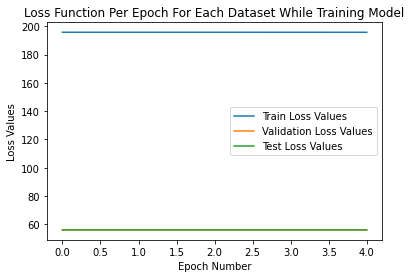

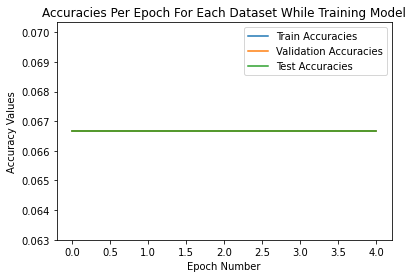


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 0, Epoch Number: 5, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.005, Ac

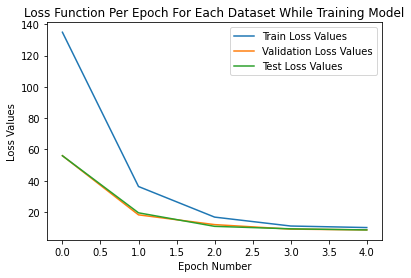

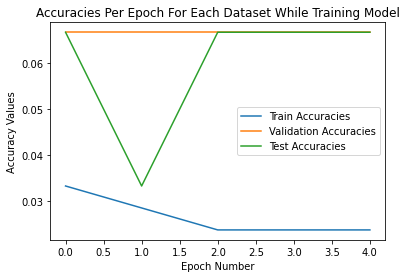


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.005
--> Recall => 0.067
--> F1-Score => 0.009

Current Model Settings:
Hidden Layer Count: 0, Epoch Number: 5, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.005, Ac

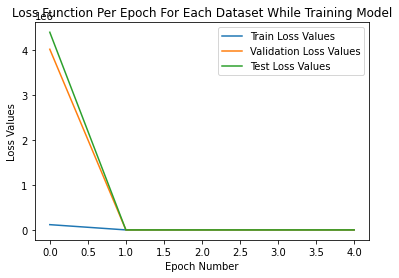

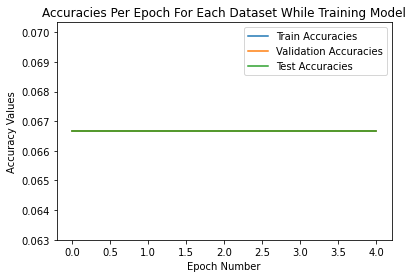


Evaluating Testing Performance:
Confusion Matrix:
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008



In [ ]:
hidden_layer_count = 0 # Constant since we experiment with single layer network
#ACTIVATION_FUNC_TYPE = "tanh"
OBJECTIVE_FUNC_TYPE = "MSE"
LEARNING_RATE = 0.005
BATCH_SIZE = 16
WILL_EARLY_STOP = False
EPOCH_NUMBER =  5

for ACTIVATION_FUNC_TYPE in (["sigmoid", "tanh", "relu"]):
  experiment_with_neural_network(LIMIT_NUMBER, class_list, trainset, validationset, testset, neuron_count_in_input_layer, neuron_count_in_output_layer, BATCH_SIZE, ACTIVATION_FUNC_TYPE, OBJECTIVE_FUNC_TYPE, LEARNING_RATE, EPOCH_NUMBER, WILL_EARLY_STOP, hidden_layer_count)

<a name="cell-id-1412"></a>
####**Part-1.4.1.2: Effect of Objective Function**

Current Model Settings:
Hidden Layer Count: 0, Epoch Number: 5, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.005, Activation Function: tanh, Objective Function: CEL, Early Stopping Activation: False

Existing model not found, therefore training a new model...

Neural Network Training Process:
--> Epoch = 1, Train Loss = 65.44, Train Accuracy = 0.03, Validation Loss = 94.82, Validation Accuracy = 0.07, Execution Time: 15.31 sec.
--> Epoch = 2, Train Loss = 28.78, Train Accuracy = 0.03, Validation Loss = 18.53, Validation Accuracy = 0.07, Execution Time: 30.66 sec.
--> Epoch = 3, Train Loss = 22.98, Train Accuracy = 0.02, Validation Loss = 6.08, Validation Accuracy = 0.07, Execution Time: 46.08 sec.
--> Epoch = 4, Train Loss = 23.04, Train Accuracy = 0.02, Validation Loss = 4.93, Validation Accuracy = 0.07, Execution Time: 66.18 sec.
--> Epoch = 5, Train Loss = 23.04, Train Accuracy = 0.02, Validation Loss = 4.80, Validation Accuracy = 0.07, Execution Time: 81.41 se

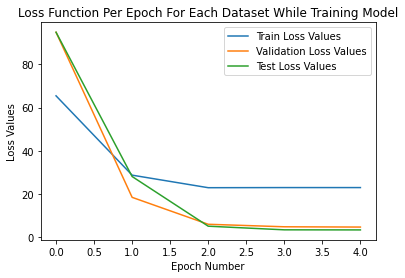

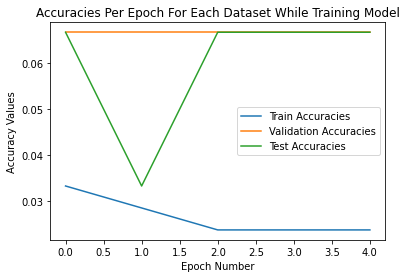


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.005
--> Recall => 0.067
--> F1-Score => 0.009

Current Model Settings:
Hidden Layer Count: 0, Epoch Number: 5, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.005, Ac

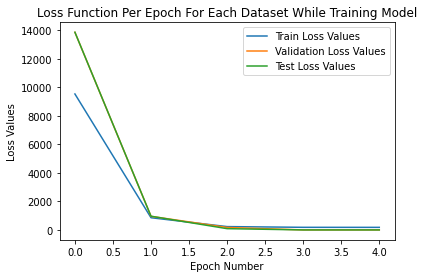

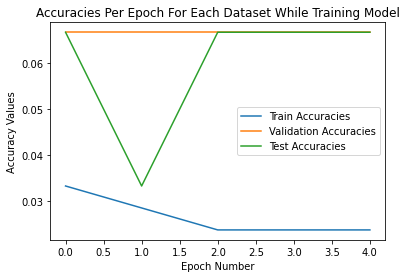


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.005
--> Recall => 0.067
--> F1-Score => 0.009

Current Model Settings:
Hidden Layer Count: 0, Epoch Number: 5, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.005, Ac

In [ ]:
hidden_layer_count = 0 # Constant since we experiment with single layer network
ACTIVATION_FUNC_TYPE = "tanh"
#OBJECTIVE_FUNC_TYPE = "MSE"
LEARNING_RATE = 0.005
BATCH_SIZE = 16
WILL_EARLY_STOP = False
EPOCH_NUMBER =  5

for OBJECTIVE_FUNC_TYPE in (["CEL", "NLL", "MAE"]): # "MSE" option has already executed in part-1, therefore i skip it in order to reduce redundancy
  experiment_with_neural_network(LIMIT_NUMBER, class_list, trainset, validationset, testset, neuron_count_in_input_layer, neuron_count_in_output_layer, BATCH_SIZE, ACTIVATION_FUNC_TYPE, OBJECTIVE_FUNC_TYPE, LEARNING_RATE, EPOCH_NUMBER, WILL_EARLY_STOP, hidden_layer_count)

<a name="cell-id-1413"></a>
####**Part-1.4.1.3: Effect of Learning Rate**

Current Model Settings:
Hidden Layer Count: 0, Epoch Number: 5, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.01, Activation Function: tanh, Objective Function: MSE, Early Stopping Activation: False

Existing model not found, therefore training a new model...

Neural Network Training Process:
--> Epoch = 1, Train Loss = 76.43, Train Accuracy = 0.03, Validation Loss = 56.00, Validation Accuracy = 0.07, Execution Time: 16.37 sec.
--> Epoch = 2, Train Loss = 13.41, Train Accuracy = 0.02, Validation Loss = 11.99, Validation Accuracy = 0.07, Execution Time: 31.64 sec.
--> Epoch = 3, Train Loss = 7.42, Train Accuracy = 0.01, Validation Loss = 8.70, Validation Accuracy = 0.07, Execution Time: 46.94 sec.
--> Epoch = 4, Train Loss = 6.50, Train Accuracy = 0.01, Validation Loss = 8.31, Validation Accuracy = 0.07, Execution Time: 62.21 sec.
--> Epoch = 5, Train Loss = 6.04, Train Accuracy = 0.01, Validation Loss = 8.14, Validation Accuracy = 0.07, Execution Time: 77.52 sec.



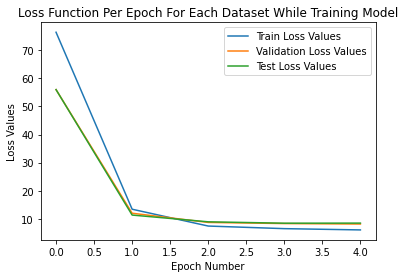

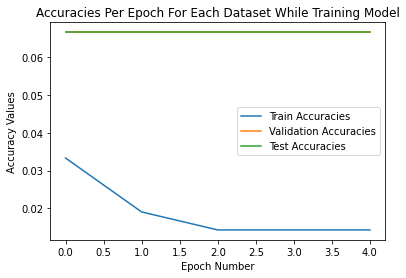


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.005
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 0, Epoch Number: 5, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.02, Act

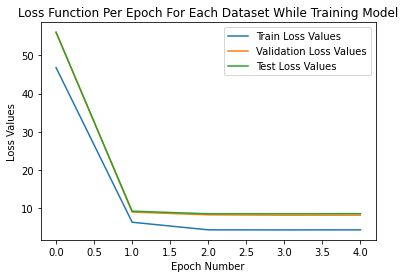

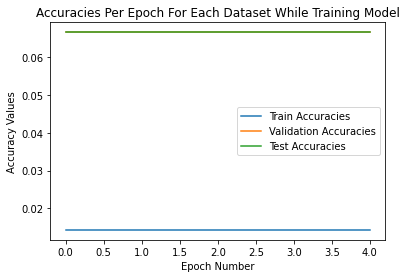


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008



In [ ]:
hidden_layer_count = 0 # Constant since we experiment with single layer network
ACTIVATION_FUNC_TYPE = "tanh"
OBJECTIVE_FUNC_TYPE = "MSE"
#LEARNING_RATE = 0.005
BATCH_SIZE = 16
WILL_EARLY_STOP = False
EPOCH_NUMBER =  5

for LEARNING_RATE in ([0.01, 0.02]): # "0.005" option has already executed in part-1, therefore i skip it in order to reduce redundancy
  experiment_with_neural_network(LIMIT_NUMBER, class_list, trainset, validationset, testset, neuron_count_in_input_layer, neuron_count_in_output_layer, BATCH_SIZE, ACTIVATION_FUNC_TYPE, OBJECTIVE_FUNC_TYPE, LEARNING_RATE, EPOCH_NUMBER, WILL_EARLY_STOP, hidden_layer_count)

<a name="cell-id-1414"></a>
####**Part-1.4.1.4: Effect of Batch Size**

Current Model Settings:
Hidden Layer Count: 0, Epoch Number: 5, Neuron Count In Input Layer: 128, Batch Size: 32, Learning Rate: 0.005, Activation Function: tanh, Objective Function: MSE, Early Stopping Activation: False

Existing model not found, therefore training a new model...

Neural Network Training Process:
--> Epoch = 1, Train Loss = 146.85, Train Accuracy = 0.08, Validation Loss = 56.00, Validation Accuracy = 0.07, Execution Time: 36.49 sec.
--> Epoch = 2, Train Loss = 41.71, Train Accuracy = 0.02, Validation Loss = 22.35, Validation Accuracy = 0.07, Execution Time: 72.81 sec.
--> Epoch = 3, Train Loss = 22.81, Train Accuracy = 0.02, Validation Loss = 15.01, Validation Accuracy = 0.08, Execution Time: 117.33 sec.
--> Epoch = 4, Train Loss = 13.55, Train Accuracy = 0.01, Validation Loss = 11.10, Validation Accuracy = 0.07, Execution Time: 149.12 sec.
--> Epoch = 5, Train Loss = 9.26, Train Accuracy = 0.02, Validation Loss = 9.36, Validation Accuracy = 0.07, Execution Time: 179.

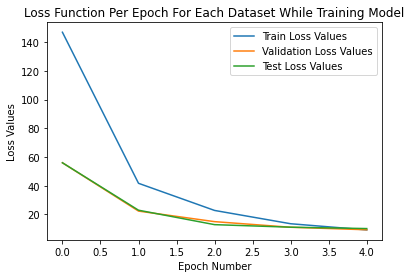

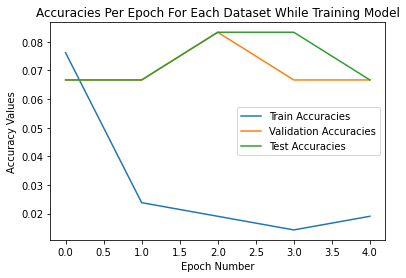


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.005
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 0, Epoch Number: 5, Neuron Count In Input Layer: 128, Batch Size: 64, Learning Rate: 0.005, Ac

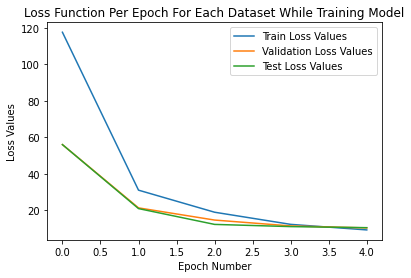

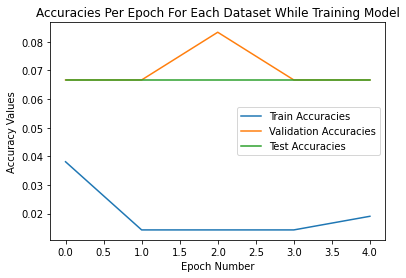


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 0, Epoch Number: 5, Neuron Count In Input Layer: 128, Batch Size: 128, Learning Rate: 0.005, A

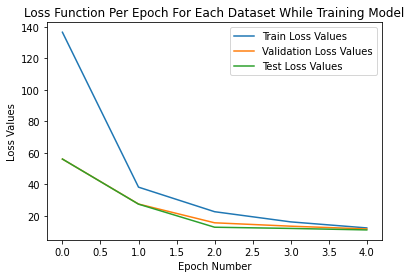

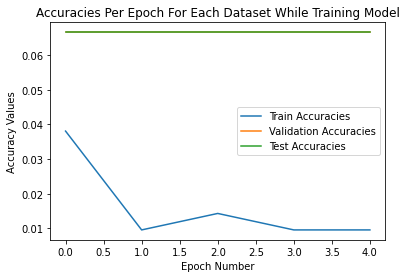


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.005
--> Recall => 0.067
--> F1-Score => 0.008



In [ ]:
hidden_layer_count = 0 # Constant since we experiment with single layer network
ACTIVATION_FUNC_TYPE = "tanh"
OBJECTIVE_FUNC_TYPE = "MSE"
LEARNING_RATE = 0.005
#BATCH_SIZE = 16
WILL_EARLY_STOP = False
EPOCH_NUMBER =  5

for BATCH_SIZE in ([32, 64, 128]): # "16" option has already executed in part-1, therefore i skip it in order to reduce redundancy
  experiment_with_neural_network(LIMIT_NUMBER, class_list, trainset, validationset, testset, neuron_count_in_input_layer, neuron_count_in_output_layer, BATCH_SIZE, ACTIVATION_FUNC_TYPE, OBJECTIVE_FUNC_TYPE, LEARNING_RATE, EPOCH_NUMBER, WILL_EARLY_STOP, hidden_layer_count)

<a name="cell-id-1415"></a>
####**Part-1.4.1.5: Effect of Early Stopping Function and Epoch Size**

Current Model Settings:
Hidden Layer Count: 0, Epoch Number: 16, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.005, Activation Function: tanh, Objective Function: MSE, Early Stopping Activation: True

Existing model not found, therefore training a new model...

Neural Network Training Process:
--> Epoch = 1, Train Loss = 134.97, Train Accuracy = 0.03, Validation Loss = 56.00, Validation Accuracy = 0.07, Execution Time: 17.71 sec.
--> Epoch = 2, Train Loss = 36.31, Train Accuracy = 0.03, Validation Loss = 18.19, Validation Accuracy = 0.07, Execution Time: 33.11 sec.
--> Epoch = 3, Train Loss = 16.75, Train Accuracy = 0.02, Validation Loss = 11.95, Validation Accuracy = 0.07, Execution Time: 48.52 sec.
--> Epoch = 4, Train Loss = 11.04, Train Accuracy = 0.02, Validation Loss = 9.06, Validation Accuracy = 0.07, Execution Time: 63.84 sec.
--> Epoch = 5, Train Loss = 10.06, Train Accuracy = 0.02, Validation Loss = 8.57, Validation Accuracy = 0.07, Execution Time: 79.27 

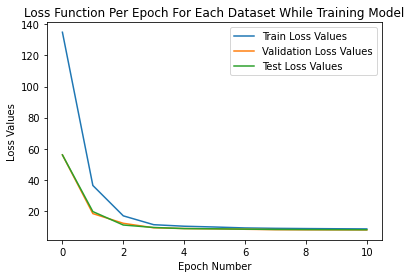

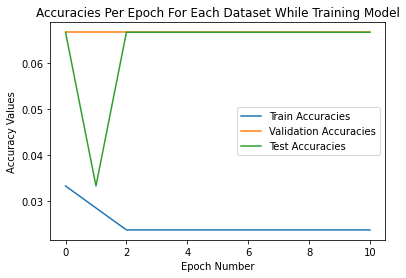


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.005
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 0, Epoch Number: 32, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.005, A

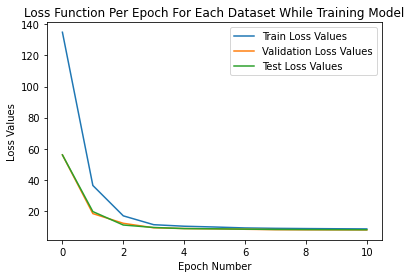

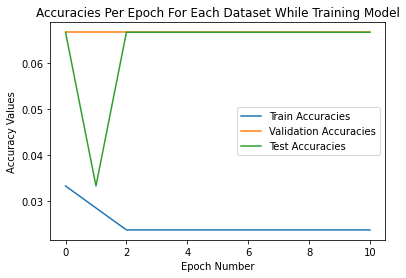


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.005
--> Recall => 0.067
--> F1-Score => 0.008



In [ ]:
hidden_layer_count = 0 # Constant since we experiment with single layer network
ACTIVATION_FUNC_TYPE = "tanh"
OBJECTIVE_FUNC_TYPE = "MSE"
LEARNING_RATE = 0.005
BATCH_SIZE = 16
WILL_EARLY_STOP = True
#EPOCH_NUMBER =  5

for EPOCH_NUMBER in ([16, 32]):
  experiment_with_neural_network(LIMIT_NUMBER, class_list, trainset, validationset, testset, neuron_count_in_input_layer, neuron_count_in_output_layer, BATCH_SIZE, ACTIVATION_FUNC_TYPE, OBJECTIVE_FUNC_TYPE, LEARNING_RATE, EPOCH_NUMBER, WILL_EARLY_STOP, hidden_layer_count)

<a name="cell-id-1416"></a>
####**Part-1.4.1.6: Neural Network Experiment Results As A Table**

In [ ]:
# It's a dynamic table generator for Python, with using data from previous experiments at part 2.4
col_names = ['Hidden Layer Count', 'Neurons In Input Layer', 'Batch Size', 'Neurons In Output Layer', 'Learning Rate', 'Activation Function', 'Objective Function', 'Epoch Number', 'Is Early Stopped?', 'Testing Accuracy']
result_df = pd.DataFrame(test_results_df, columns=col_names)
print(result_df.to_string())

# Resetting table for next neural network experiments
test_results_df = []

    Hidden Layer Count  Neurons In Input Layer  Batch Size  Neurons In Output Layer  Learning Rate Activation Function Objective Function  Epoch Number  Is Early Stopped?  Testing Accuracy
0                    0                     128          16                       15          0.005             sigmoid                MSE             5              False          0.066667
1                    0                     128          16                       15          0.005                tanh                MSE             5              False          0.066667
2                    0                     128          16                       15          0.005                relu                MSE             5              False          0.066667
3                    0                     128          16                       15          0.005                tanh                CEL             5              False          0.066667
4                    0                     128         

<a name="cell-id-142"></a>
###**Part-1.4.2: Experimenting With NN Which Contains One Hidden Layer**

<a name="cell-id-1421"></a>
####**Part-1.4.2.1: Effect of Activation Function**

Current Model Settings:
Hidden Layer Count: 1, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.01, Activation Function: sigmoid, Objective Function: MSE, Early Stopping Activation: False

Existing model not found, therefore training a new model...

Neural Network Training Process:
--> Epoch = 1, Train Loss = 195.68, Train Accuracy = 0.07, Validation Loss = 55.92, Validation Accuracy = 0.07, Execution Time: 17.08 sec.
--> Epoch = 2, Train Loss = 195.62, Train Accuracy = 0.07, Validation Loss = 55.90, Validation Accuracy = 0.07, Execution Time: 36.02 sec.
--> Epoch = 3, Train Loss = 195.49, Train Accuracy = 0.07, Validation Loss = 55.88, Validation Accuracy = 0.07, Execution Time: 55.45 sec.

Evaluating Training Performance:



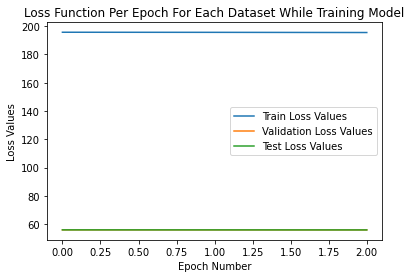

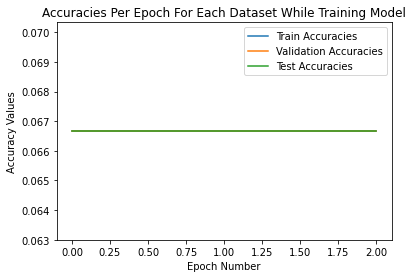


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 1, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.01, Act

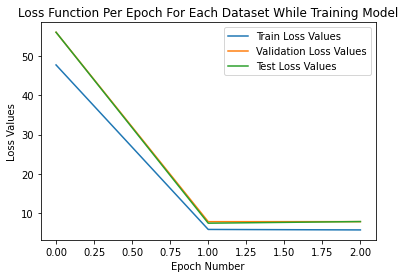

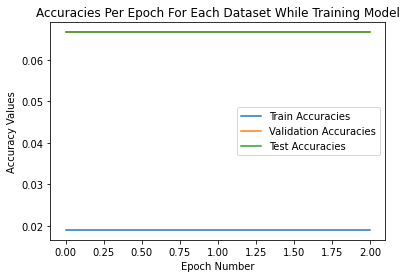


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.005
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 1, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.01, Act

<ipython-input-28-9cb83e01413e>:81: RuntimeWarning: overflow encountered in double_scalars
  for i in range(len(weights)-1): activation_value += weights[i] * inputs[i]
<ipython-input-28-9cb83e01413e>:121: RuntimeWarning: overflow encountered in double_scalars
  error += (neuron['weights'][j] * neuron['error'])
<ipython-input-28-9cb83e01413e>:144: RuntimeWarning: overflow encountered in double_scalars
  neuron['weights'][j] -= learning_rate * neuron['error'] * inputs[j]
<ipython-input-28-9cb83e01413e>:81: RuntimeWarning: invalid value encountered in double_scalars
  for i in range(len(weights)-1): activation_value += weights[i] * inputs[i]
<ipython-input-28-9cb83e01413e>:144: RuntimeWarning: invalid value encountered in double_scalars
  neuron['weights'][j] -= learning_rate * neuron['error'] * inputs[j]


--> Epoch = 1, Train Loss = 6869171.24, Train Accuracy = 0.07, Validation Loss = 235495105.48, Validation Accuracy = 0.07, Execution Time: 15.41 sec.
--> Epoch = 2, Train Loss = 14.00, Train Accuracy = 0.07, Validation Loss = 4.00, Validation Accuracy = 0.07, Execution Time: 30.60 sec.
--> Epoch = 3, Train Loss = 14.00, Train Accuracy = 0.07, Validation Loss = 4.00, Validation Accuracy = 0.07, Execution Time: 46.02 sec.

Evaluating Training Performance:



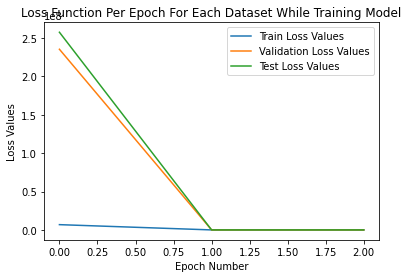

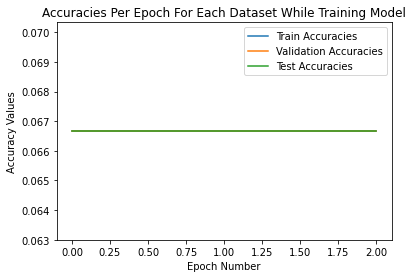


Evaluating Testing Performance:
Confusion Matrix:
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008



<ipython-input-28-9cb83e01413e>:81: RuntimeWarning: invalid value encountered in double_scalars
  for i in range(len(weights)-1): activation_value += weights[i] * inputs[i]


In [ ]:
hidden_layer_count = 1 # Constant since we experiment with single layer network
#ACTIVATION_FUNC_TYPE = "tanh"
OBJECTIVE_FUNC_TYPE = "MSE"
LEARNING_RATE = 0.01
BATCH_SIZE = 16
WILL_EARLY_STOP = False
EPOCH_NUMBER =  3

for ACTIVATION_FUNC_TYPE in (["sigmoid", "tanh", "relu"]):
  experiment_with_neural_network(LIMIT_NUMBER, class_list, trainset, validationset, testset, neuron_count_in_input_layer, neuron_count_in_output_layer, BATCH_SIZE, ACTIVATION_FUNC_TYPE, OBJECTIVE_FUNC_TYPE, LEARNING_RATE, EPOCH_NUMBER, WILL_EARLY_STOP, hidden_layer_count)

<a name="cell-id-1422"></a>
####**Part-1.4.2.2: Effect of Objective Function**

Current Model Settings:
Hidden Layer Count: 1, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.01, Activation Function: tanh, Objective Function: CEL, Early Stopping Activation: False

Existing model not found, therefore training a new model...

Neural Network Training Process:
--> Epoch = 1, Train Loss = 30.22, Train Accuracy = 0.02, Validation Loss = 94.82, Validation Accuracy = 0.07, Execution Time: 17.06 sec.
--> Epoch = 2, Train Loss = 22.48, Train Accuracy = 0.02, Validation Loss = 0.55, Validation Accuracy = 0.07, Execution Time: 37.28 sec.
--> Epoch = 3, Train Loss = 22.30, Train Accuracy = 0.02, Validation Loss = -0.03, Validation Accuracy = 0.07, Execution Time: 52.79 sec.

Evaluating Training Performance:



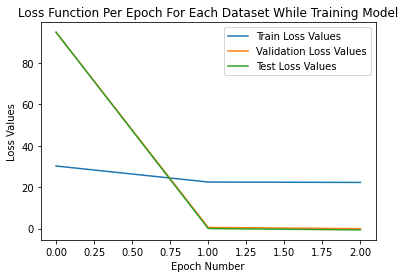

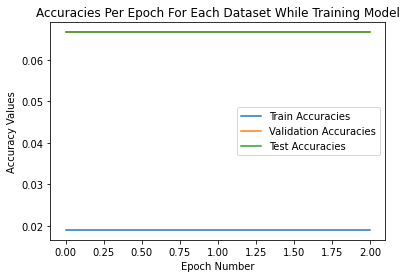


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.005
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 1, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.01, Act

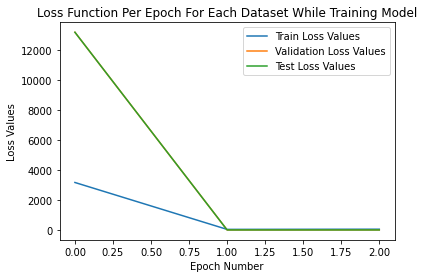

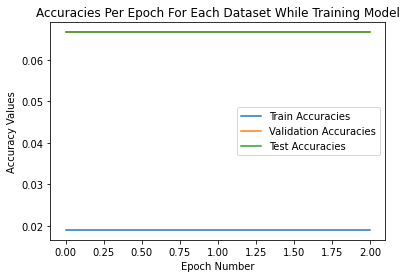


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.005
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 1, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.01, Act

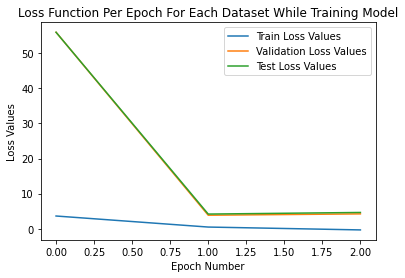

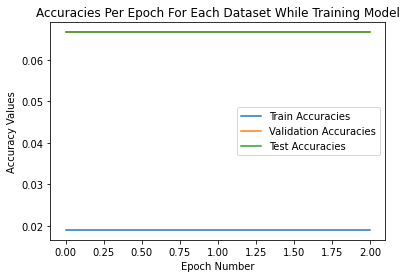


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.005
--> Recall => 0.067
--> F1-Score => 0.008



In [ ]:
hidden_layer_count = 1 # Constant since we experiment with single layer network
ACTIVATION_FUNC_TYPE = "tanh"
#OBJECTIVE_FUNC_TYPE = "MSE"
LEARNING_RATE = 0.01
BATCH_SIZE = 16
WILL_EARLY_STOP = False
EPOCH_NUMBER =  3

for OBJECTIVE_FUNC_TYPE in (["CEL", "NLL", "MAE"]): # "MSE" option has already executed in part-1, therefore i skip it in order to reduce redundancy
  experiment_with_neural_network(LIMIT_NUMBER, class_list, trainset, validationset, testset, neuron_count_in_input_layer, neuron_count_in_output_layer, BATCH_SIZE, ACTIVATION_FUNC_TYPE, OBJECTIVE_FUNC_TYPE, LEARNING_RATE, EPOCH_NUMBER, WILL_EARLY_STOP, hidden_layer_count)

<a name="cell-id-1423"></a>
####**Part-1.4.2.3: Effect of Learning Rate**

Current Model Settings:
Hidden Layer Count: 1, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.005, Activation Function: tanh, Objective Function: MSE, Early Stopping Activation: False

Existing model not found, therefore training a new model...

Neural Network Training Process:
--> Epoch = 1, Train Loss = 69.05, Train Accuracy = 0.03, Validation Loss = 56.00, Validation Accuracy = 0.07, Execution Time: 18.31 sec.
--> Epoch = 2, Train Loss = 8.73, Train Accuracy = 0.02, Validation Loss = 8.51, Validation Accuracy = 0.08, Execution Time: 33.66 sec.
--> Epoch = 3, Train Loss = 7.92, Train Accuracy = 0.02, Validation Loss = 7.63, Validation Accuracy = 0.07, Execution Time: 49.01 sec.

Evaluating Training Performance:



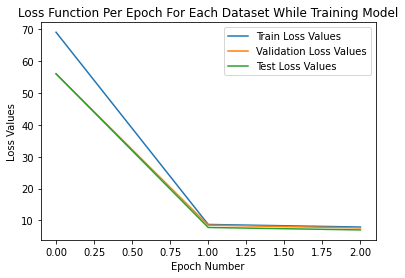

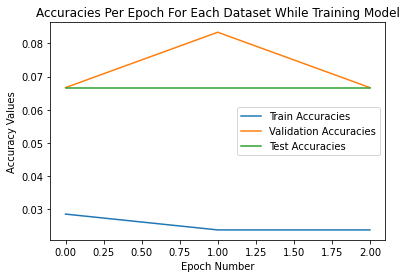


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.005
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 1, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.02, Act

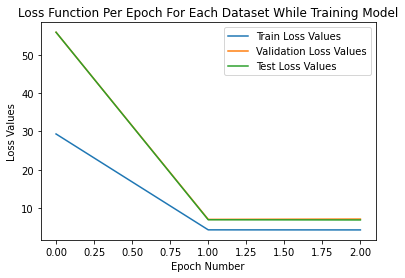

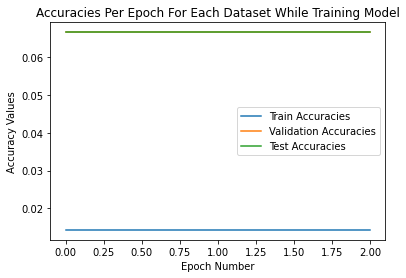


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008



In [ ]:
hidden_layer_count = 1 # Constant since we experiment with single layer network
ACTIVATION_FUNC_TYPE = "tanh"
OBJECTIVE_FUNC_TYPE = "MSE"
#LEARNING_RATE = 0.01
BATCH_SIZE = 16
WILL_EARLY_STOP = False
EPOCH_NUMBER =  3

for LEARNING_RATE in ([0.005, 0.02]): # "0.01" option has already executed in part-1, therefore i skip it in order to reduce redundancy
  experiment_with_neural_network(LIMIT_NUMBER, class_list, trainset, validationset, testset, neuron_count_in_input_layer, neuron_count_in_output_layer, BATCH_SIZE, ACTIVATION_FUNC_TYPE, OBJECTIVE_FUNC_TYPE, LEARNING_RATE, EPOCH_NUMBER, WILL_EARLY_STOP, hidden_layer_count)

<a name="cell-id-1424"></a>
####**Part-1.4.2.4: Effect of Batch Size**

Current Model Settings:
Hidden Layer Count: 1, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 32, Learning Rate: 0.01, Activation Function: tanh, Objective Function: MSE, Early Stopping Activation: False

Existing model not found, therefore training a new model...

Neural Network Training Process:
--> Epoch = 1, Train Loss = 39.99, Train Accuracy = 0.01, Validation Loss = 56.00, Validation Accuracy = 0.07, Execution Time: 32.24 sec.
--> Epoch = 2, Train Loss = 4.19, Train Accuracy = 0.01, Validation Loss = 7.91, Validation Accuracy = 0.08, Execution Time: 67.78 sec.
--> Epoch = 3, Train Loss = 4.20, Train Accuracy = 0.01, Validation Loss = 7.91, Validation Accuracy = 0.08, Execution Time: 98.52 sec.

Evaluating Training Performance:



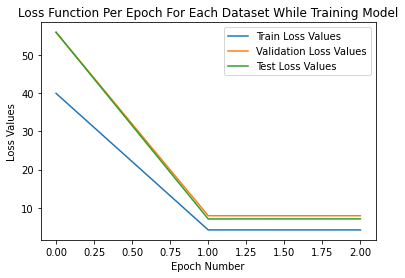

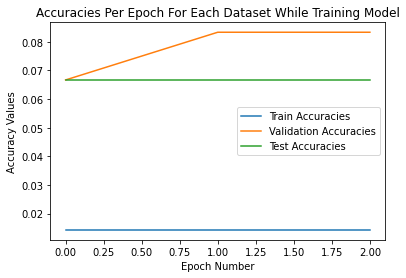


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 1, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 64, Learning Rate: 0.01, Act

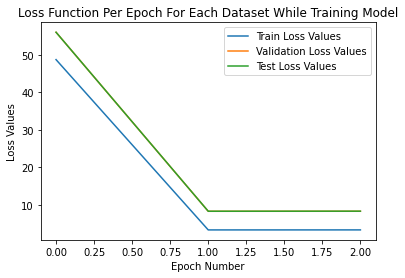

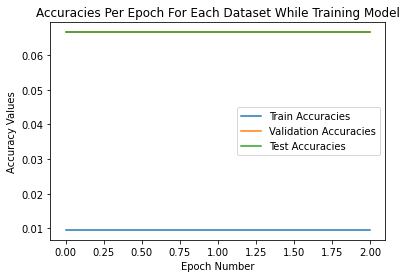


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.005
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 1, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 128, Learning Rate: 0.01, Ac

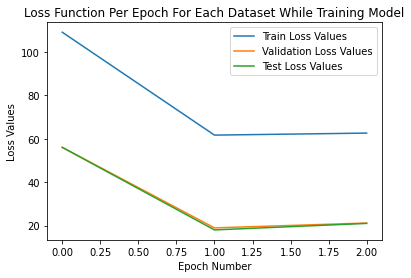

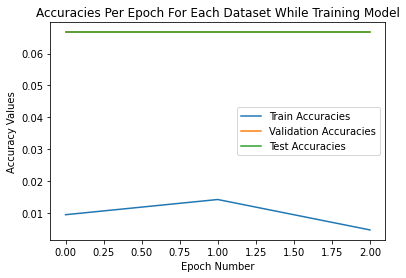


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008



In [ ]:
hidden_layer_count = 1 # Constant since we experiment with single layer network
ACTIVATION_FUNC_TYPE = "tanh"
OBJECTIVE_FUNC_TYPE = "MSE"
LEARNING_RATE = 0.01
#BATCH_SIZE = 16
WILL_EARLY_STOP = False
EPOCH_NUMBER =  3

for BATCH_SIZE in ([32, 64, 128]): # "16" option has already executed in part-1, therefore i skip it in order to reduce redundancy
  experiment_with_neural_network(LIMIT_NUMBER, class_list, trainset, validationset, testset, neuron_count_in_input_layer, neuron_count_in_output_layer, BATCH_SIZE, ACTIVATION_FUNC_TYPE, OBJECTIVE_FUNC_TYPE, LEARNING_RATE, EPOCH_NUMBER, WILL_EARLY_STOP, hidden_layer_count)

<a name="cell-id-1425"></a>
####**Part-1.4.2.5: Effect of Early Stopping Function and Epoch Size**

Current Model Settings:
Hidden Layer Count: 1, Epoch Number: 16, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.01, Activation Function: tanh, Objective Function: MSE, Early Stopping Activation: True

Existing model not found, therefore training a new model...

Neural Network Training Process:
--> Epoch = 1, Train Loss = 47.70, Train Accuracy = 0.02, Validation Loss = 56.00, Validation Accuracy = 0.07, Execution Time: 17.09 sec.
--> Epoch = 2, Train Loss = 5.93, Train Accuracy = 0.02, Validation Loss = 7.90, Validation Accuracy = 0.07, Execution Time: 32.54 sec.
--> Epoch = 3, Train Loss = 5.81, Train Accuracy = 0.02, Validation Loss = 7.91, Validation Accuracy = 0.07, Execution Time: 47.78 sec.
--> Epoch = 4, Train Loss = 5.79, Train Accuracy = 0.02, Validation Loss = 7.87, Validation Accuracy = 0.07, Execution Time: 62.94 sec.
--> Epoch = 5, Train Loss = 5.77, Train Accuracy = 0.02, Validation Loss = 7.80, Validation Accuracy = 0.07, Execution Time: 78.26 sec.
-->

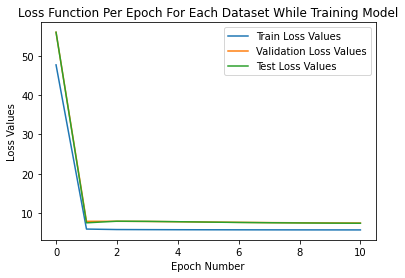

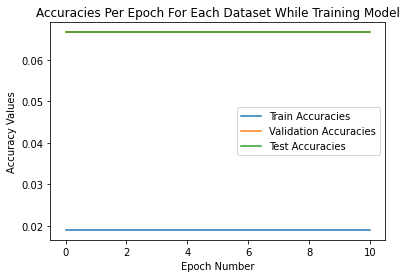


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.005
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 1, Epoch Number: 32, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.01, Ac

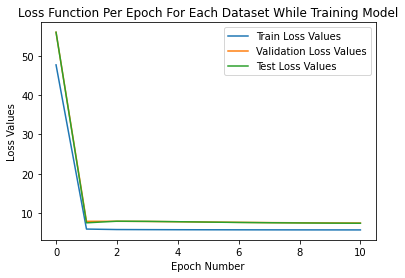

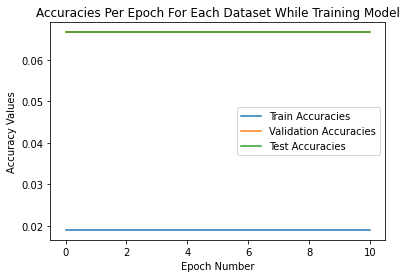


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.005
--> Recall => 0.067
--> F1-Score => 0.008



In [ ]:
hidden_layer_count = 1 # Constant since we experiment with single layer network
ACTIVATION_FUNC_TYPE = "tanh"
OBJECTIVE_FUNC_TYPE = "MSE"
LEARNING_RATE = 0.01
BATCH_SIZE = 16
WILL_EARLY_STOP = True
#EPOCH_NUMBER = 3

for EPOCH_NUMBER in ([16, 32]):
  experiment_with_neural_network(LIMIT_NUMBER, class_list, trainset, validationset, testset, neuron_count_in_input_layer, neuron_count_in_output_layer, BATCH_SIZE, ACTIVATION_FUNC_TYPE, OBJECTIVE_FUNC_TYPE, LEARNING_RATE, EPOCH_NUMBER, WILL_EARLY_STOP, hidden_layer_count)

<a name="cell-id-1426"></a>
####**Part-1.4.2.6: Neural Network Experiment Results As A Table**

In [ ]:
# It's a dynamic table generator for Python, with using data from previous experiments at part 2.4
col_names = ['Hidden Layer Count', 'Neurons In Input Layer', 'Batch Size', 'Neurons In Output Layer', 'Learning Rate', 'Activation Function', 'Objective Function', 'Epoch Number', 'Is Early Stopped?', 'Testing Accuracy']
result_df = pd.DataFrame(test_results_df, columns=col_names)
print(result_df.to_string())

# Resetting table for next neural network experiments
test_results_df = []

    Hidden Layer Count  Neurons In Input Layer  Batch Size  Neurons In Output Layer  Learning Rate Activation Function Objective Function  Epoch Number  Is Early Stopped?  Testing Accuracy
0                    1                     128          16                       15          0.010             sigmoid                MSE             3              False          0.066667
1                    1                     128          16                       15          0.010                tanh                MSE             3              False          0.066667
2                    1                     128          16                       15          0.010                relu                MSE             3              False          0.066667
3                    1                     128          16                       15          0.010                tanh                CEL             3              False          0.066667
4                    1                     128         

<a name="cell-id-143"></a>
###**Part-1.4.3: Experimenting With NN Which Contains Two Hidden Layers**

<a name="cell-id-1431"></a>
####**Part-1.4.3.1: Effect of Activation Function**

Current Model Settings:
Hidden Layer Count: 2, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.01, Activation Function: sigmoid, Objective Function: MSE, Early Stopping Activation: False

Existing model not found, therefore training a new model...

Neural Network Training Process:
--> Epoch = 1, Train Loss = 195.90, Train Accuracy = 0.07, Validation Loss = 55.97, Validation Accuracy = 0.07, Execution Time: 15.48 sec.
--> Epoch = 2, Train Loss = 195.90, Train Accuracy = 0.07, Validation Loss = 55.97, Validation Accuracy = 0.07, Execution Time: 34.99 sec.
--> Epoch = 3, Train Loss = 195.90, Train Accuracy = 0.07, Validation Loss = 55.97, Validation Accuracy = 0.07, Execution Time: 51.12 sec.

Evaluating Training Performance:



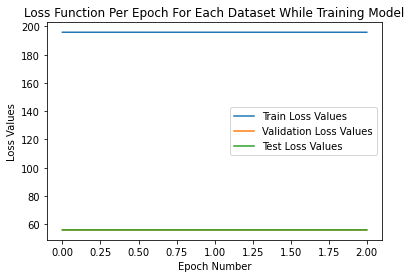

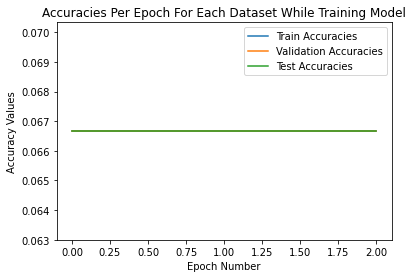


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 2, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.01, Act

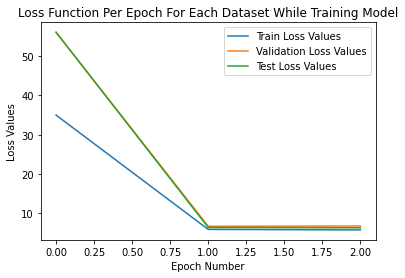

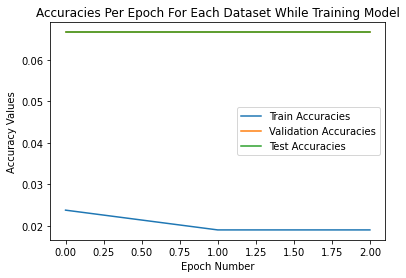


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 2, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.01, Act

<ipython-input-28-9cb83e01413e>:81: RuntimeWarning: overflow encountered in double_scalars
  for i in range(len(weights)-1): activation_value += weights[i] * inputs[i]
<ipython-input-28-9cb83e01413e>:121: RuntimeWarning: overflow encountered in double_scalars
  error += (neuron['weights'][j] * neuron['error'])
<ipython-input-28-9cb83e01413e>:81: RuntimeWarning: invalid value encountered in double_scalars
  for i in range(len(weights)-1): activation_value += weights[i] * inputs[i]
<ipython-input-28-9cb83e01413e>:144: RuntimeWarning: invalid value encountered in double_scalars
  neuron['weights'][j] -= learning_rate * neuron['error'] * inputs[j]
<ipython-input-28-9cb83e01413e>:144: RuntimeWarning: overflow encountered in double_scalars
  neuron['weights'][j] -= learning_rate * neuron['error'] * inputs[j]


--> Epoch = 1, Train Loss = 487536945.45, Train Accuracy = 0.07, Validation Loss = 16714516311.70, Validation Accuracy = 0.07, Execution Time: 15.48 sec.
--> Epoch = 2, Train Loss = 14.00, Train Accuracy = 0.07, Validation Loss = 4.00, Validation Accuracy = 0.07, Execution Time: 30.83 sec.
--> Epoch = 3, Train Loss = 14.00, Train Accuracy = 0.07, Validation Loss = 4.00, Validation Accuracy = 0.07, Execution Time: 46.03 sec.

Evaluating Training Performance:



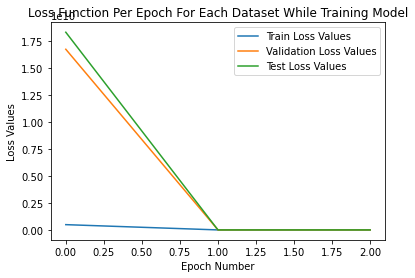

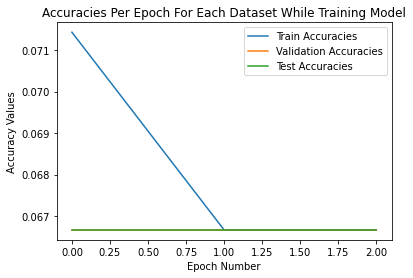


Evaluating Testing Performance:
Confusion Matrix:
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008



<ipython-input-28-9cb83e01413e>:81: RuntimeWarning: invalid value encountered in double_scalars
  for i in range(len(weights)-1): activation_value += weights[i] * inputs[i]


In [ ]:
hidden_layer_count = 2 # Constant since we experiment with single layer network
#ACTIVATION_FUNC_TYPE = "tanh"
OBJECTIVE_FUNC_TYPE = "MSE"
LEARNING_RATE = 0.01
BATCH_SIZE = 16
WILL_EARLY_STOP = False
EPOCH_NUMBER = 3

for ACTIVATION_FUNC_TYPE in (["sigmoid", "tanh", "relu"]):
  experiment_with_neural_network(LIMIT_NUMBER, class_list, trainset, validationset, testset, neuron_count_in_input_layer, neuron_count_in_output_layer, BATCH_SIZE, ACTIVATION_FUNC_TYPE, OBJECTIVE_FUNC_TYPE, LEARNING_RATE, EPOCH_NUMBER, WILL_EARLY_STOP, hidden_layer_count)

<a name="cell-id-1432"></a>
####**Part-1.4.3.2: Effect of Objective Function**

Current Model Settings:
Hidden Layer Count: 2, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.01, Activation Function: tanh, Objective Function: CEL, Early Stopping Activation: False

Existing model not found, therefore training a new model...

Neural Network Training Process:
--> Epoch = 1, Train Loss = 27.68, Train Accuracy = 0.02, Validation Loss = 94.82, Validation Accuracy = 0.07, Execution Time: 17.85 sec.
--> Epoch = 2, Train Loss = 22.30, Train Accuracy = 0.02, Validation Loss = 3.68, Validation Accuracy = 0.07, Execution Time: 36.38 sec.
--> Epoch = 3, Train Loss = 22.25, Train Accuracy = 0.02, Validation Loss = 4.55, Validation Accuracy = 0.07, Execution Time: 52.47 sec.

Evaluating Training Performance:



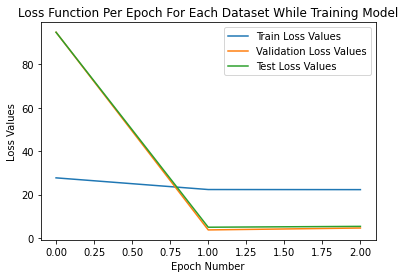

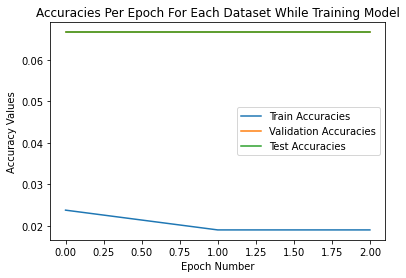


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 2, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.01, Act

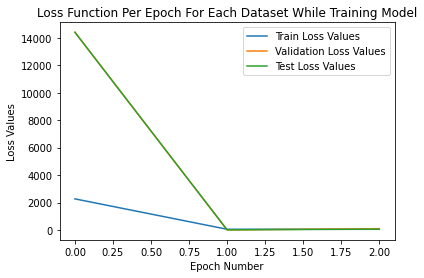

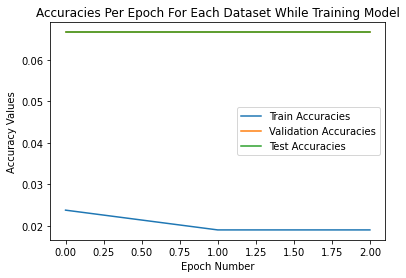


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 2, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.01, Act

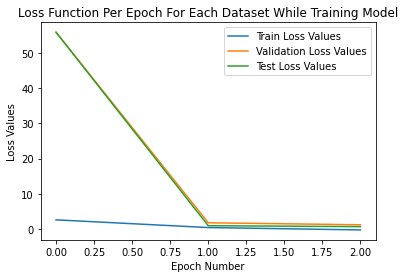

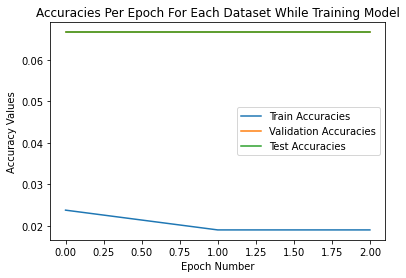


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008



In [ ]:
hidden_layer_count = 2 # Constant since we experiment with single layer network
ACTIVATION_FUNC_TYPE = "tanh"
#OBJECTIVE_FUNC_TYPE = "MSE"
LEARNING_RATE = 0.01
BATCH_SIZE = 16
WILL_EARLY_STOP = False
EPOCH_NUMBER = 3

for OBJECTIVE_FUNC_TYPE in (["CEL", "NLL", "MAE"]): # "MSE" option has already executed in part-1, therefore i skip it in order to reduce redundancy
  experiment_with_neural_network(LIMIT_NUMBER, class_list, trainset, validationset, testset, neuron_count_in_input_layer, neuron_count_in_output_layer, BATCH_SIZE, ACTIVATION_FUNC_TYPE, OBJECTIVE_FUNC_TYPE, LEARNING_RATE, EPOCH_NUMBER, WILL_EARLY_STOP, hidden_layer_count)

<a name="cell-id-1433"></a>
####**Part-1.4.3.3: Effect of Learning Rate**

Current Model Settings:
Hidden Layer Count: 2, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.01, Activation Function: tanh, Objective Function: MSE, Early Stopping Activation: False

Existing model found, loading it...

Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

M

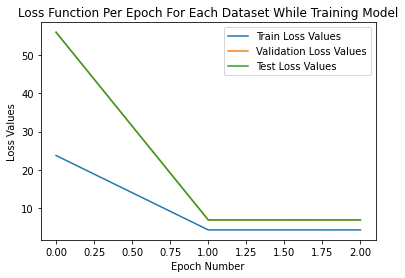

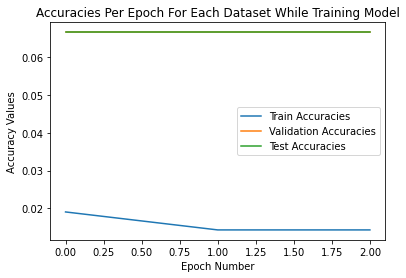


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008



In [ ]:
hidden_layer_count = 2 # Constant since we experiment with single layer network
ACTIVATION_FUNC_TYPE = "tanh"
OBJECTIVE_FUNC_TYPE = "MSE"
#LEARNING_RATE = 0.01
BATCH_SIZE = 16
WILL_EARLY_STOP = False
EPOCH_NUMBER = 3

for LEARNING_RATE in ([0.01, 0.02]): # "0.01" option has already executed in part-1, therefore i skip it in order to reduce redundancy
  experiment_with_neural_network(LIMIT_NUMBER, class_list, trainset, validationset, testset, neuron_count_in_input_layer, neuron_count_in_output_layer, BATCH_SIZE, ACTIVATION_FUNC_TYPE, OBJECTIVE_FUNC_TYPE, LEARNING_RATE, EPOCH_NUMBER, WILL_EARLY_STOP, hidden_layer_count)

<a name="cell-id-1434"></a>
####**Part-1.4.3.4: Effect of Batch Size**

Current Model Settings:
Hidden Layer Count: 2, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 32, Learning Rate: 0.01, Activation Function: tanh, Objective Function: MSE, Early Stopping Activation: False

Existing model not found, therefore training a new model...

Neural Network Training Process:
--> Epoch = 1, Train Loss = 44.35, Train Accuracy = 0.01, Validation Loss = 56.00, Validation Accuracy = 0.07, Execution Time: 32.53 sec.
--> Epoch = 2, Train Loss = 4.19, Train Accuracy = 0.01, Validation Loss = 6.73, Validation Accuracy = 0.07, Execution Time: 63.60 sec.
--> Epoch = 3, Train Loss = 4.18, Train Accuracy = 0.01, Validation Loss = 6.75, Validation Accuracy = 0.07, Execution Time: 94.68 sec.

Evaluating Training Performance:



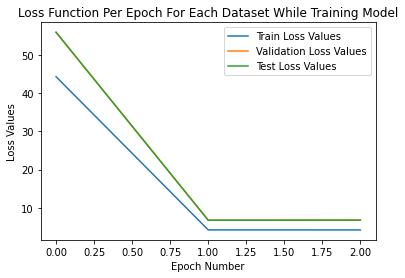

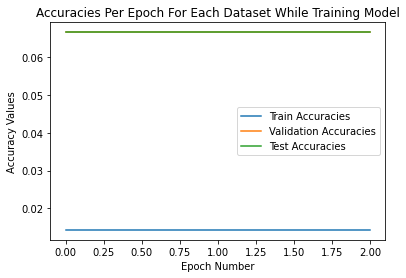


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 2, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 64, Learning Rate: 0.01, Act

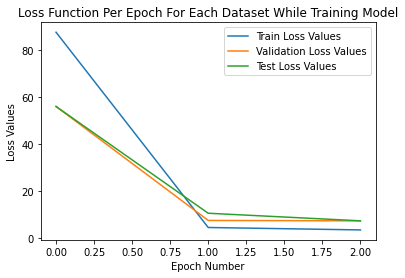

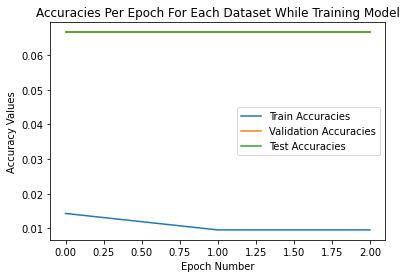


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 2, Epoch Number: 3, Neuron Count In Input Layer: 128, Batch Size: 128, Learning Rate: 0.01, Ac

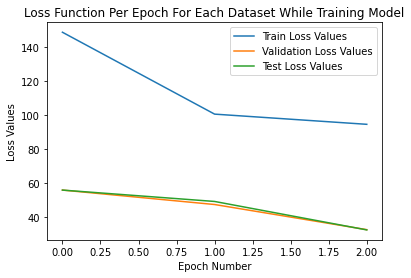

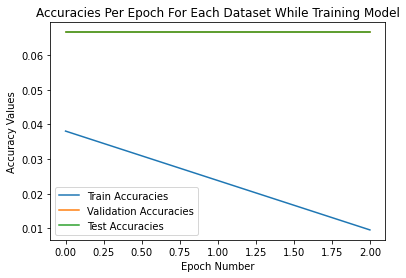


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008



In [ ]:
hidden_layer_count = 2 # Constant since we experiment with single layer network
ACTIVATION_FUNC_TYPE = "tanh"
OBJECTIVE_FUNC_TYPE = "MSE"
LEARNING_RATE = 0.01
#BATCH_SIZE = 16
WILL_EARLY_STOP = False
EPOCH_NUMBER = 3

for BATCH_SIZE in ([32, 64, 128]): # "16" option has already executed in part-1, therefore i skip it in order to reduce redundancy
  experiment_with_neural_network(LIMIT_NUMBER, class_list, trainset, validationset, testset, neuron_count_in_input_layer, neuron_count_in_output_layer, BATCH_SIZE, ACTIVATION_FUNC_TYPE, OBJECTIVE_FUNC_TYPE, LEARNING_RATE, EPOCH_NUMBER, WILL_EARLY_STOP, hidden_layer_count)

<a name="cell-id-1435"></a>
####**Part-1.4.3.5: Effect of Early Stopping Function and Epoch Size**

Current Model Settings:
Hidden Layer Count: 2, Epoch Number: 16, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.01, Activation Function: tanh, Objective Function: MSE, Early Stopping Activation: True

Existing model not found, therefore training a new model...

Neural Network Training Process:
--> Epoch = 1, Train Loss = 34.97, Train Accuracy = 0.02, Validation Loss = 56.00, Validation Accuracy = 0.07, Execution Time: 17.39 sec.
--> Epoch = 2, Train Loss = 5.96, Train Accuracy = 0.02, Validation Loss = 6.75, Validation Accuracy = 0.07, Execution Time: 32.88 sec.
--> Epoch = 3, Train Loss = 5.83, Train Accuracy = 0.02, Validation Loss = 6.83, Validation Accuracy = 0.07, Execution Time: 48.34 sec.
--> Epoch = 4, Train Loss = 5.78, Train Accuracy = 0.02, Validation Loss = 6.97, Validation Accuracy = 0.07, Execution Time: 63.88 sec.
--> Epoch = 5, Train Loss = 5.78, Train Accuracy = 0.02, Validation Loss = 7.11, Validation Accuracy = 0.07, Execution Time: 79.36 sec.
-->

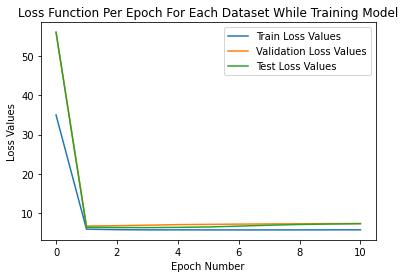

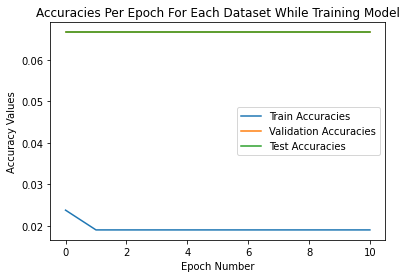


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008

Current Model Settings:
Hidden Layer Count: 2, Epoch Number: 32, Neuron Count In Input Layer: 128, Batch Size: 16, Learning Rate: 0.01, Ac

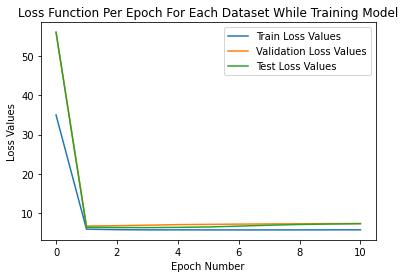

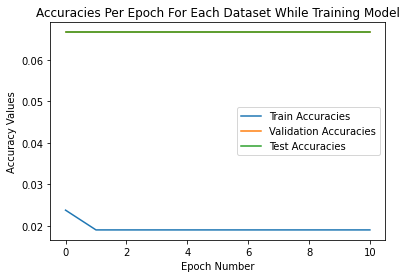


Evaluating Testing Performance:
Confusion Matrix:
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Model Evaluation With Test Set:
--> Accuracy => 0.067
--> Precision => 0.004
--> Recall => 0.067
--> F1-Score => 0.008



In [ ]:
hidden_layer_count = 2 # Constant since we experiment with single layer network
ACTIVATION_FUNC_TYPE = "tanh"
OBJECTIVE_FUNC_TYPE = "MSE"
LEARNING_RATE = 0.01
BATCH_SIZE = 16
WILL_EARLY_STOP = True
#EPOCH_NUMBER = 3

for EPOCH_NUMBER in ([16, 32]):
  experiment_with_neural_network(LIMIT_NUMBER, class_list, trainset, validationset, testset, neuron_count_in_input_layer, neuron_count_in_output_layer, BATCH_SIZE, ACTIVATION_FUNC_TYPE, OBJECTIVE_FUNC_TYPE, LEARNING_RATE, EPOCH_NUMBER, WILL_EARLY_STOP, hidden_layer_count)

<a name="cell-id-1436"></a>
####**Part-1.4.3.6: Neural Network Experiment Results As A Table**

In [ ]:
# It's a dynamic table generator for Python, with using data from previous experiments at part 2.4
col_names = ['Hidden Layer Count', 'Neurons In Input Layer', 'Batch Size', 'Neurons In Output Layer', 'Learning Rate', 'Activation Function', 'Objective Function', 'Epoch Number', 'Is Early Stopped?', 'Testing Accuracy']
result_df = pd.DataFrame(test_results_df, columns=col_names)
print(result_df.to_string())

    Hidden Layer Count  Neurons In Input Layer  Batch Size  Neurons In Output Layer  Learning Rate Activation Function Objective Function  Epoch Number  Is Early Stopped?  Testing Accuracy
0                    2                     128          16                       15           0.01             sigmoid                MSE             3              False          0.066667
1                    2                     128          16                       15           0.01                tanh                MSE             3              False          0.066667
2                    2                     128          16                       15           0.01                relu                MSE             3              False          0.066667
3                    2                     128          16                       15           0.01                tanh                CEL             3              False          0.066667
4                    2                     128         

<a name="cell-id-15"></a>
##**Part-1.5: Neural Network Experiment Results As A Report**

**Effect of Activation Function:** Activation function decides whether a neuron should be activated or not. Different functions may be helpful in different cases, therefore testing and selecting ideal one could be better. But in my experiments, i get best results with **tanh**, then **sigmoid**.

**Effect of Objective Function:** A loss function is a function that compares the target and predicted output values; measures how well the neural network models the training data. Different functions may be helpful in different cases, therefore testing and selecting ideal one could be better. But in my experiments, i get best results with **Mean Square Error (MSE)**.

**Effect of Learning Rate:** High learning rate means reducing error faster but in that case it may not converge to minimum value (maybe it can even diverge). On the other hand, low learning rate means reducing error slower (therefore execution will be longer) but it will converge to minimum value with a higher probability. In my experiments, i get best results with **0.01 learning rate**.

**Effect of Batch Size:** Using too few neurons in the hidden layers will result in something called underfitting. Underfitting occurs when there are too few neurons in the hidden layers to adequately detect the signals in a complicated data set. If too many neurons will be used, than model will overfit. In addition, suggested batch size for input layer is number of features in the dataset. In my experiments, i get best results with **64 batch size**.

**Effect of Early Stopping Function and Epoch Number:** Early stopping function prevents overfitting with checking error and/or accuracy in each 10 epochs on validation set. On the other hand, low epoch number (usually) means underfitting while high epoch number (usually) means overfitting. With using early stopping, it becomes easier to balance. In my experiments, i get best results with **activating early stop function with higher epoch numbers** (if dataset is not compliated, otherwise model overfits before reaching 10th epoch).

**Effect of Hidden Layer Count:** One hidden layer allows a neural network to approximate any function involving "a continuous mapping from one finite space to another". Therefore low number of hidden layers usually has a potential risk of underfitting and high number of hidden layers usually has a potential risk of overfitting. In my experiments, i get best results with **2 hidden layers**.

**General Results For Implemented Neural Network:**
*   This neural network only works well with datasets which contains maximum 4 classes (in our dataset we had 15) and less amount of features such as 15 (in our dataset we had 128). Therefore our model selects one class and overfits immediately.
*   Because learning capacities of such primitive neural networks are quite limited. For example, in CNN there are +30 layers but there we used maximum 2 hidden layers. In CNN different functions are used in different layers but we used same functions for each of layers in there. They make model suck about scalability in cases such as image files. 
*   We can easily get %90 accuracies in just 10 epochs with using a simplier dataset (as i mentioned in the previous entry). I tried it, you can try too.
*   Since all of accuracies are same with this dataset, **these (text) results are found with experimenting on a different simplier dataset**.




<a name="cell-id-2"></a>
#**Part-2: Working With VGG-19 Convolutional Neural Network**

####**Important Note:** In order to prevent probability of crashes due to RAM errors in COLAB, i strongly recommend that; 
####1. Resetting current runtime in COLAB.
####2. Then starting code execution at there.

<a name="cell-id-21"></a>
##**Part-2.1: Importing Required Libraries**

In [ ]:
import os
import cv2
import math
import numpy as np
import pandas as pd
from time import time
from tqdm import tqdm
import natsort as natsort
from os.path import exists
from PIL.Image import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.models as models
from torch import optim
from torch import IntTensor
from torch.utils import data
from torch.utils.data import Dataset
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, random_split
import warnings 
warnings.filterwarnings("ignore") # Ignoring warnings

# I know there are redundancies in importing part but i don't change them with principle of "don't touch if it works" :)

<a name="cell-id-22"></a>
##**Part-2.2: Importing Vegetable Image Dataset**

In this part, we import vegetable dataset from Google Drive. Since we import it from Google Drive (it makes execution faster and it makes us save time from different aspects) **probably these codes wont work without colab (for example in IDE)**.

In [ ]:
from google.colab import drive
import os
import shutil

# Part-1: Deleting the dataset folder if it exists in current working directory
try: shutil.rmtree("Vegetable Images")
except: pass
# Required in order to save time while developing the project

# Part-2: Accessing the Google Drive
drive.mount('/content/drive')
print("")

# Part-3: Checking whether dataset exists in Google Drive
if os.path.isfile("/content/drive/MyDrive/Vegetable Images.zip") == False:
  print("Error: File doesn't exist or failed to connect to Google Drive!")
  print("")

# Part-4: Unzipping whole dataset
!unzip "/content/drive/MyDrive/Vegetable Images.zip"

areImagesInitialized = False

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/train

<a name="cell-id-23"></a>
##**Part-2.3: Implementing Required Functions**

*   **`Model Tester:`** This functions tests model with using test (or validation) set and prints important metrics. In this function gradient operations, backward propagations etc. are not allowed.
*   **`Prediction Maker:`** This function makes prediction for whole given input dataset and returns predictions.
*   **`Model Trainer:`** This function trains model with using train set and prints important metrics. In this function gradient operations, backward propagations etc. are allowed (instead of tester function).
*   **`Epoch Loop Maker:`** This function makes n epoch loops and returns stored accuracy and loss values for each epoch and for each dataset. (required for plotting)
*   **`Transform Definer:`** This function transforms images in efficient way (for example reduces images' size to 128x128)
*   **`Data Preparator:`** This function splits and prepares data into correct from with using "Vegatable Images" folder.
*   **`VGG-19 Model Initialator:`** This function initializes a VGG-19 neural network with using given device (cpu), learning rate, finetune option, loss and optimization functions.
*   **`Model Evaluator:`** This function evaluates training model with using actual and predicted arrays and returns important metrics such as accuracy, precision, recall and F1-score. Also this function prints a (class_number) * (class_number) confusion matrix.
*   **`VGG-19 Experiment Maker:`** This function creates, trains, evaluates and stores important data (data size, model settings, training and test accuracies etc.) for different VGG-19 experiments. This function was used to find ideal parameters with making different experiments.

In [ ]:
def testModel(epoch, model, willPrint, testData, loss_function, device):
  # Step-1: Defining important constants
  totalLoss = 0
  starting_time = time()
  accuracies = []

  # Step-2: Training model with each sample in training data
  with torch.no_grad():  
  # Important Note: We are disabling gradient calculating for inside this loop
    for i, batch in enumerate(testData):
      
      # Step-2.1: Defining x (features) and y (target value)
      model_input = batch[0].to(device)
      target_value = batch[1].to(device)

      # Step-2.2: Finding the output of model
      model_output = model(model_input)

      # Step-2.3: Computing the loss value
      loss = loss_function(model_output, target_value)
      totalLoss += loss.item()

      # Step-2.4: Making prediction and calculating accuracy by prediction
      predicted = model_output.argmax(dim=1)
      accuracies.append((target_value == predicted).sum().item() / target_value.shape[0])

  # Step-3: Printing a debugging line and returning average testing loss & accuracy
  if(willPrint): print('Epoch: {}, Test Loss: {:.2f}, Accuracy: {:.2f}, Execution Time: {:.2f} sec.'.format(epoch, totalLoss / len(testData), sum(accuracies) / len(accuracies), time() - starting_time))
  return totalLoss / len(testData), sum(accuracies) / len(accuracies)

def make_prediction(model, data, device, loss_function):
  # Step-1: Defining important constants
  total_loss = 0
  accuracies = []
  actual_values = []
  predicted_values = []

  # Step-2: Making predictions with each sample in testing data 
  with torch.no_grad():
  # Important Note: We are disabling gradient calculating for inside this loop  
    for i, batch in tqdm(enumerate(data)):
      
      # Step-2.1: Defining x (features) and y (target value)
      model_input = batch[0].to(device)
      target_value = batch[1].to(device)

      # Step-2.2: Finding the output of model
      model_output = model(model_input)

      # Step-2.3: Computing the loss value
      loss = loss_function(model_output, target_value)
      total_loss += loss.item()

      # Step-2.4: Making prediction and calculating accuracy by prediction
      predicted = model_output.argmax(dim=1)
      accuracies.append((target_value == predicted).sum().item() / target_value.shape[0])

      # Step-2.5: Storing actual and predicted values (for model evaluation part)
      for value in target_value: actual_values.append(IntTensor.item(value))
      for value in predicted: predicted_values.append(IntTensor.item(value))

  # Step-3: Calculating average loss and accuracy
  average_loss = total_loss / len(data)
  average_accuracy = sum(accuracies) / len(accuracies)

  # Step-4: Returning loss, accuracy, actual and predicted values (for model evaluation part)
  return average_loss, average_accuracy, actual_values, predicted_values

def trainModel(epoch, model, trainData, loss_function, device, optimization_function):
  # Step-1: Defining important constants
  totalLoss = 0
  starting_time = time()
  accuracies = []

  # Step-2: Training model with each sample in training data
  for i, batch in enumerate(trainData, 1):
    # Step-2.1: Defining x (features) and y (target value)
    model_input = batch[0].to(device)
    target_value = batch[1].to(device)

    # Step-2.2: Finding the output of model
    model_output = model(model_input)

    # Step-2.3: Computing the loss value
    loss = loss_function(model_output, target_value)
    totalLoss += loss.item()

    # Step-2.4: Optimizing the neural network
    optimization_function.zero_grad()

    # Step-2.5: Making a back propogation process
    loss.backward()

    # Step-2.6: Updating model parameters
    optimization_function.step()

    # Step-2.7: Making prediction and calculating accuracy by prediction
    predicted = model_output.argmax(dim=1)
    accuracies.append((target_value == predicted).sum().item() / target_value.shape[0])
    #print('Epoch: {}, Train Loss: {:.2f}, Accuracy: {:.2f}, Execution Time: {:.2f} sec.'.format(epoch, loss.item(), sum(accuracies) / len(accuracies), time() - starting_time))
    
  # Step-3: Printing a debugging line and returning average training loss & accuracy
  print('Epoch: {}, Train Loss: {:.2f}, Accuracy: {:.2f}, Execution Time: {:.2f} sec.'.format(epoch, totalLoss / len(trainData), sum(accuracies) / len(accuracies), time() - starting_time))
  return totalLoss / len(trainData), sum(accuracies) / len(accuracies)

def epochLoop(epochNumber, model, trainData, validationData, testData, loss_function, device, optimization_function, batchSize, learningRate, willEarlyStop, model_name):
  # Step-1: Defining loss and accuracy lists for each of datasets (required for plotting function)
  trainLosses = []
  validationLosses = []
  testLosses = []
  trainAccuracies = []
  validationAccuracies = []
  testAccuracies = []
  epochValues = []
  validationAccuracyFor10Epoch = 0.0 # Required for early stopping
  isStartedToOverfit = False

  # Step-2: Making an epoch loop
  for epoch in range(1, epochNumber + 1):
    if(not(isStartedToOverfit)):
      # Step-2.1: Training model with train set and storing loss & accuracy values (for visualization)
      trainLoss, trainAccuracy = trainModel(epoch, model, trainData, loss_function, device, optimization_function)
      # Step-2.2: Testing model with test set and storing loss & accuracy values (for visualization)
      testLoss, testAccuracy = testModel(epoch, model, True, testData, loss_function, device)
      # Step-2.3: Testing model with validation set and storing loss & accuracy values (for visualization)
      validationLoss, validationAccuracy = testModel(epoch, model, False, validationData, loss_function, device)
      if(epoch==1): validationAccuracyFor10Epoch = validationAccuracy # Initializing checker accuracy value

      # Step-2.4: Checking whether model starts to overfit in each 10 epochs 
      if(not(isStartedToOverfit) and (epoch%10==0)):
        print("Checking early stopping...")
        # Step-2.4.1: If models validation accuracy started to decrease, then stop training
        if(validationAccuracyFor10Epoch > validationAccuracy):
          isStartedToOverfit = True
          print("WARNING! Model early stopped since model started to overfit!")
          print("Validation Accuracy 10 Epoch Before: " + str(str(validationAccuracyFor10Epoch)) + " -> New Validation Accuracy: " + str(validationAccuracy))
        # Step-2.4.2: Otherwise, update checker validation accuracy value
        else:
          validationAccuracyFor10Epoch = validationAccuracy

      # Step-2.5: Storing required values
      trainLosses.append(trainLoss)
      testLosses.append(testLoss)
      validationAccuracies.append(validationAccuracy)
      validationAccuracies.append(validationAccuracy)
      trainAccuracies.append(trainAccuracy)
      testAccuracies.append(testAccuracy)
      epochValues.append(epoch)

  # Step-3: Saving model in correct form, in order to use it later  
  torch.save(model, f"./" + str(model_name) + ".pth")

  # Step-4: Returning required values
  return trainLosses, validationLosses, testLosses, trainAccuracies, validationAccuracies, testAccuracies, epochValues, not isStartedToOverfit

def defineTransforms(IMG_SIZE):
  # https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html
  # Goal: This function transforms image in a better format for machine learning
  return transforms.Compose([transforms.RandomHorizontalFlip(p=0.3),transforms.RandomRotation(degrees=40),transforms.Resize((IMG_SIZE,IMG_SIZE)),transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

def prepareData(validationPercentage, testPercentage, batchSize, trainData, validationData, testData, SUBSET_NUMBER, willUseSubset):
  
  # Step-1: Determining sizes of each sets with given input percentage parameters
  trainNumber = math.floor((100 - testPercentage - validationPercentage) * SUBSET_NUMBER / 100)
  validationNumber = math.ceil(validationPercentage * SUBSET_NUMBER / 100)
  testNumber = math.ceil(testPercentage * SUBSET_NUMBER / 100)

  # Step-2: Slicing data if not all of dataset will be used (SUBSET_NUMBER of samples will be used as total)
  if willUseSubset: trainData = torch.utils.data.Subset(trainData, np.random.choice(len(trainData), trainNumber, replace=False))
  if willUseSubset: validationData = torch.utils.data.Subset(validationData, np.random.choice(len(validationData), validationNumber, replace=False))
  if willUseSubset: testData = torch.utils.data.Subset(testData, np.random.choice(len(testData), testNumber, replace=False))

  # Step-3: Initializing data loaders
  trainDataset = DataLoader(dataset=trainData, batch_size=batchSize, shuffle=True, num_workers=1)
  validationDataset = DataLoader(dataset=validationData, batch_size=batchSize, shuffle=True, num_workers=1)
  testDataset = DataLoader(dataset=testData, batch_size=batchSize, shuffle=True, num_workers=1)

  # Step-4: Retuning splitted datasets
  return trainDataset, validationDataset, testDataset

def initVGG19Model(device, learningRate, numberOfClasses, finetuneAll):
  # Step-1: Initializing VGG-19 neural network model
  vgg19 = models.vgg19(pretrained=True)
  removed = list(vgg19.classifier.children())[:-1]
  vgg19.classifier = nn.Sequential(*removed)
  vgg19.classifier = nn.Sequential(*list(vgg19.classifier.children()), nn.Linear(in_features=4096, out_features=numberOfClasses, bias=True))

  # Step-2: Determining to finetuning all of them or only last two layers
  if (finetuneAll):

    # Goal: Freezing required weights with using requires_grad() function
    for parameter in vgg19.features.parameters():
      parameter.requires_grad = False
      # This freezes layers except fully connected layers at the end

  model = vgg19.to(device)

  # Step-3: Determining loss and optimization functions
  loss_function = nn.CrossEntropyLoss()
  optimization_function = optim.Adam(vgg19.parameters(), lr=learningRate)

  # Step-4: Returning model and required functions
  return model, loss_function, optimization_function
  
def model_evaluator(predicted, actual, number_of_classes):
  accuracy = 0.0
  precision = 0.0
  recall = 0.0

  # Step-1: Creating and printing a (number_of_classes)x(number_of_classes) confusion matrix
  confusion_matrix = []
  for i in range(number_of_classes):
    sub = [0]
    for j in range(number_of_classes-1):
      sub.append(0)
    confusion_matrix.append(sub)
  
  for i in range(len(actual)):
    try:
      if(actual[i] == predicted[i]):
        confusion_matrix[int(actual[i])][int(actual[i])] += 1 
      elif(actual[i] != predicted[i]):
        confusion_matrix[int(actual[i])][int(predicted[i])] += 1
    except: pass

  print("")
  print("Confusion Matrix:")
  for i in range(number_of_classes): print(confusion_matrix[i])
  print("")

  # Step-2: Calculation of model accuracy
  positive = 0.0
  for i in range(number_of_classes):
    if(confusion_matrix[i][i] > 0):
      positive += confusion_matrix[i][i]
  accuracy = positive / float(len(actual))

  # Step-3: Calculation of model precision
  for i in range(number_of_classes):
    temp = 0.0
    try: # Try-except is required since there can be some zero division errors due to zero values in the confusion matrix 
      for j in range(number_of_classes):
        temp += confusion_matrix[j][i]
      precision += (confusion_matrix[i][i] / temp)
    except:
      pass
  precision /= number_of_classes

  # Step-4: Calculation of model recall
  for i in range(number_of_classes):
    temp = 0.0
    try: # Try-except is required since there can be some zero division errors due to zero values in the confusion matrix 
      for j in range(number_of_classes):
        temp += confusion_matrix[i][j]
      recall += (confusion_matrix[i][i] / temp)
    except:
      pass
  recall /= number_of_classes

  # Step-5: Calculation of F1 score
  try: f1_score = 2 * (precision * recall) / (precision + recall)
  except: f1_score = 0.00

  # Step-6: Returning accuracy, precision, recall and F1 score
  return accuracy, precision, recall, f1_score

def clearDataSets(model_name):
  try: shutil.rmtree(model_name)
  except: pass

def experiment_with_vgg19(willUseSubset, SUBSET_NUMBER, willEarlyStop, validationPercentage, testPercentage, numberOfClasses, batch_size_list, epoch_number_list, learning_rate_list, finetune_option_list, isFinalModel):
  # Step-1: Training models with each of given constraints
  for BATCH_SIZE in batch_size_list:
    trainData, validationData, testData = prepareData(validationPercentage, testPercentage, BATCH_SIZE, trainfolder, validationfolder, testfolder, SUBSET_NUMBER, willUseSubset)
    device = torch.device("cpu")
    for EPOCH_NUMBER in epoch_number_list:
      for LEARNING_RATE in learning_rate_list:
        for FINETUNE_OPTION in finetune_option_list:
          
          # Step-1.1: Storing required stuff for making a table for all experiments at next block
          results = []
          if willUseSubset: results.append(SUBSET_NUMBER)
          else: results.append(21.000)
          results.append(BATCH_SIZE)
          results.append(EPOCH_NUMBER)
          results.append(LEARNING_RATE)
          results.append(FINETUNE_OPTION)        
          if(isFinalModel): model_name = "final_model_with_ideal_settings"
          else: model_name = str(EPOCH_NUMBER) + "_Epochs-" + str(LEARNING_RATE) + "_LearningRate-" + str(BATCH_SIZE) + "_BatchSize-" + str(FINETUNE_OPTION)
          
          # Step-1.2: If model is existing, just loading it
          if(os.path.exists(model_name + ".pth")):
            print("Existing model found, loading it...")
            print("")
            print("Current Model Settings:")
            print("Epoch Number: " + str(EPOCH_NUMBER) + " - Learning Rate: " + str(LEARNING_RATE) + " - Batch Size: " + str(BATCH_SIZE) + " - Finetune Option: " + str(FINETUNE_OPTION))
            print("")
            model = torch.load((model_name + ".pth"), map_location=device)
            results.append("No Info [Pretrained Model Used!]")
            results.append("No Info [Pretrained Model Used!]")
          
          # Step-1.3: Otherwise training a model with given constraints
          else:
            # Step-1.3.1: Training model
            print("Existing model not found, therefore training a new model...")
            print("")
            print("Current Model Settings:")
            print("Epoch Number: " + str(EPOCH_NUMBER) + " - Learning Rate: " + str(LEARNING_RATE) + " - Batch Size: " + str(BATCH_SIZE) + " - Finetune Option: " + str(FINETUNE_OPTION))
            print("")
            print("Model Training Process:")
            finetuneOption = True if FINETUNE_OPTION == "FinetuneAll" else False
            model, loss_function, optimization_function = initVGG19Model(device, LEARNING_RATE, numberOfClasses, finetuneOption)
            trainLosses, validationLosses, testLosses, trainAccuracies, validationAccuracies, testAccuracies, epochValues, isEarlyStopped = epochLoop(EPOCH_NUMBER, model, trainData, validationData, testData, loss_function, device, optimization_function, BATCH_SIZE, LEARNING_RATE, willEarlyStop, model_name)
            results.append(not isEarlyStopped)
            results.append(str(round(trainAccuracies[-1], 2)))
            print("")

            # Step-1.3.2: Visualizing the general performance of trained model
            print("Evaluating Training Performance:")
            plt.plot(epochValues, trainLosses, label="Train Loss Values")
            try: plt.plot(epochValues, validationLosses, label="Validation Loss Values")
            except: pass # Required if total epoch_number < 10
            plt.plot(epochValues, testLosses, label="Test Loss Values")
            plt.title("Loss Function Per Epoch For Each Dataset While Training Model")
            plt.xlabel("Epoch Number")
            plt.ylabel("Loss Values")
            plt.legend()
            plt.show()
            print("")
            plt.plot(epochValues, trainAccuracies, label="Train Accuracies")
            try: plt.plot(epochValues, validationAccuracies, label="Validation Accuracies")
            except: pass # Required if total epoch_number < 10
            plt.plot(epochValues, testAccuracies, label="Test Accuracies")
            plt.title("Accuracies Per Epoch For Each Dataset While Training Model")
            plt.xlabel("Epoch Number")
            plt.ylabel("Accuracy Values")
            plt.legend()
            plt.show()
            print("")

          # Step-1.4: Testing the model
          print("Evaluating Testing Performance:")
          average_loss, average_accuracy, actual_values, predicted_values = make_prediction(model, testData, device, loss_function=nn.CrossEntropyLoss())
          accuracy, precision, recall, f1_score = model_evaluator(predicted_values, actual_values, numberOfClasses)
          print("Testing Accuracy -> " + str(round(average_accuracy, 2)) + " Testing Precision -> " + str(round(precision, 2)) + " Testing Recall -> " + str(round(recall, 2)) + " Testing F1-Score -> " + str(round(f1_score, 2)))
          results.append(str(round(average_accuracy, 2)))
          print("")
          print("*****************************************")
          print("")
          test_results_df.append(results)

          # Step-1.5: Memory optimization with garbage collectors -> Required for preventing Google Colab's crash
          del model

<a name="cell-id-24"></a>
##**Part-2.4: Training and Testing Different Models With Different Settings**

In this part, in order to find best settings we will make 4 sub tests with total 12 different tests with using small (but same) datasets.

Final model at part 2.6 (which has greater data set with best model options) can be found at:

https://drive.google.com/file/d/1BD1PAmn5BHgcW3o9VVe7dFXBwFQR8NVj/view?usp=share_link

Other parts are just experiments with smaller datasets, therefore i didn't uploaded them (and each of them cost 500 MB).

In [ ]:
# Defining static constants
IMAGE_SIZE = 128
test_results_df = []
willEarlyStop = True
validationPercentage = 20
testPercentage = 20
numberOfClasses = 15

# Preparing the image dataset
if(not areImagesInitialized):
  transforms = defineTransforms(IMAGE_SIZE)
  trainfolder = ImageFolder("Vegetable Images/train", transforms)
  validationfolder = ImageFolder("Vegetable Images/validation", transforms)
  testfolder = ImageFolder("Vegetable Images/test", transforms)
  areImagesInitialized = True

<a name="cell-id-241"></a>
###**Part-2.4.1: Effect Of Batch Size (Experiment 1)**
*   Data Length: 300 Samples
*   Image Size: 128x128 Pixels
*   **Batch Size: 16, 32, 64, 128**
*   Epoch Number: 16
*   Learning Rate: 0.01
*   Finetune Option: All




Existing model not found, therefore training a new model...

Current Model Settings:
Epoch Number: 16 - Learning Rate: 0.01 - Batch Size: 16 - Finetune Option: FinetuneAll

Model Training Process:
Epoch: 1, Train Loss: 436.50, Accuracy: 0.11, Execution Time: 54.93 sec.
Epoch: 1, Test Loss: 185.77, Accuracy: 0.20, Execution Time: 12.88 sec.
Epoch: 2, Train Loss: 95.95, Accuracy: 0.32, Execution Time: 55.86 sec.
Epoch: 2, Test Loss: 89.10, Accuracy: 0.42, Execution Time: 15.20 sec.
Epoch: 3, Train Loss: 60.04, Accuracy: 0.52, Execution Time: 55.71 sec.
Epoch: 3, Test Loss: 77.00, Accuracy: 0.54, Execution Time: 15.10 sec.
Epoch: 4, Train Loss: 98.89, Accuracy: 0.59, Execution Time: 62.52 sec.
Epoch: 4, Test Loss: 193.13, Accuracy: 0.35, Execution Time: 15.30 sec.
Epoch: 5, Train Loss: 122.36, Accuracy: 0.57, Execution Time: 58.20 sec.
Epoch: 5, Test Loss: 159.99, Accuracy: 0.53, Execution Time: 14.46 sec.
Epoch: 6, Train Loss: 132.23, Accuracy: 0.61, Execution Time: 67.31 sec.
Epoch: 6, 

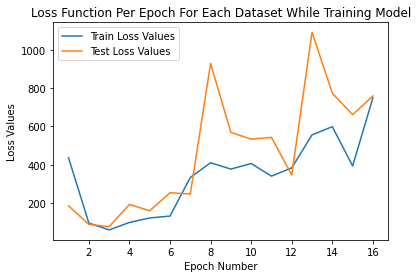

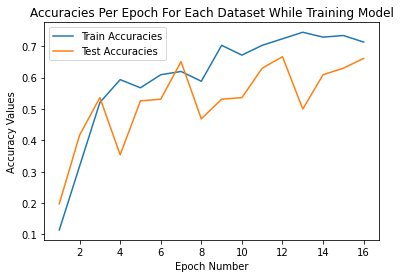


Evaluating Testing Performance:


4it [00:13,  3.27s/it]



Confusion Matrix:
[3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3]

Testing Accuracy -> 0.73 Testing Precision -> 0.76 Testing Recall -> 0.7 Testing F1-Score -> 0.73

*****************************************

Existing model not found, therefore training a new model...

Current Model Settings:
Epoch Number: 16 - Learning Rate: 0.01 - Batch Size: 32 - Finet

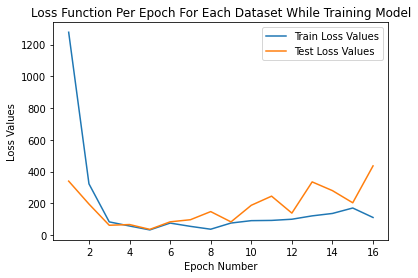

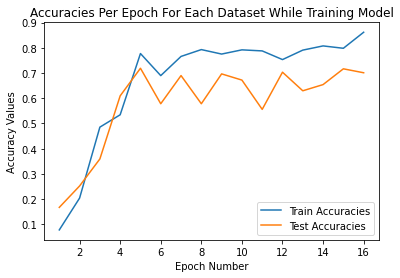


Evaluating Testing Performance:


2it [00:15,  7.54s/it]



Confusion Matrix:
[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 6, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 9, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4]

Testing Accuracy -> 0.69 Testing Precision -> 0.66 Testing Recall -> 0.68 Testing F1-Score -> 0.67

*****************************************

Existing model not found, therefore training a new model...

Current Model Settings:
Epoch Number: 16 - Learning Rate: 0.01 - Batch Size: 64 - Fine

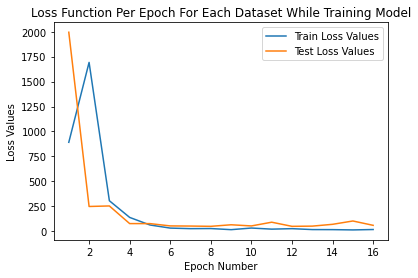

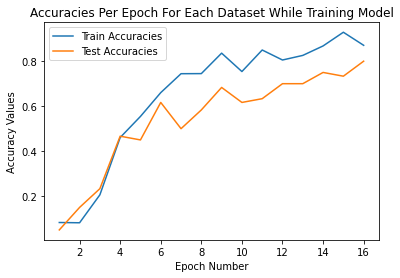


Evaluating Testing Performance:


1it [00:13, 13.04s/it]



Confusion Matrix:
[2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 2, 0, 0, 1, 1]
[0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0]
[0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1]

Testing Accuracy -> 0.63 Testing Precision -> 0.72 Testing Recall -> 0.7 Testing F1-Score -> 0.71

*****************************************

Existing model not found, therefore training a new model...

Current Model Settings:
Epoch Number: 16 - Learning Rate: 0.01 - Batch Size: 128 - Fine

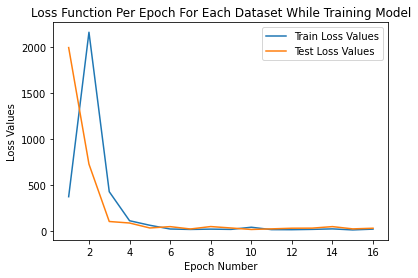

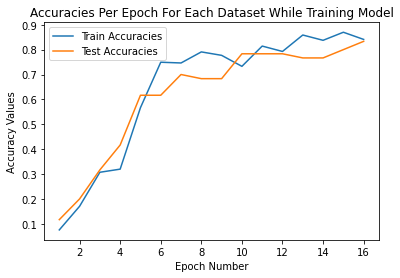


Evaluating Testing Performance:


1it [00:13, 13.62s/it]



Confusion Matrix:
[3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5]

Testing Accuracy -> 0.87 Testing Precision -> 0.89 Testing Recall -> 0.87 Testing F1-Score -> 0.88

*****************************************



In [ ]:
# Step-1: Defining required and important constants
willUseSubset = True 
SUBSET_NUMBER = 300
batch_size_list = ([16, 32, 64, 128])
epoch_number_list = ([16])
learning_rate_list = ([0.01])
finetune_option_list = (["FinetuneAll"])
isFinalModel = False

# Step-2: Make experiment and store results
experiment_with_vgg19(willUseSubset, SUBSET_NUMBER, willEarlyStop, validationPercentage, testPercentage, numberOfClasses, batch_size_list, epoch_number_list, learning_rate_list, finetune_option_list, isFinalModel)

###**Experiment Results & Literature Review:**

*   The batch size defines the number of samples that will be propagated through the network.
*   Batch size is an important hyperparameter that influences the dynamics of the learning algorithm.
*   Batch size controls the accuracy of the estimate of the error gradient in the training stage.
*   There is a tension between batch size and the speed and stability of the learning process.
*   Increasing the batch size of neural network reduces the learners' generalization capacity.
*   Increasing batch size reduces performance since it cuts training expenditures in half.
*   On one hand, a small batch size can converge faster than a large batch, but a large batch can reach optimum minima that a small batch size cannot reach. Also, a small batch size can have a significant regularization effect because of its high variance but it will require a small learning rate to prevent it from overshooting the minima. [1]
*   Larger batch sizes train faster but don't always converge as fast. Smaller batch sizes train slower, but can converge faster. 
*   According to our previous experiments, 128 is ideal batch size between 16, 32, 64 and 128.

[Reference-1] -> https://www.sciencedirect.com/science/article/pii/S2405959519303455


<a name="cell-id-242"></a>
###**Part-2.4.2: Effect Of Epoch Number (Experiment 2)**
*   Data Length: 300 Samples
*   Image Size: 128x128 Pixels
*   Batch Size: 32
*   **Epoch Number: 8, 16, 32, 64** ('16' has already done at part-1, therefore i skip it!)
*   Learning Rate: 0.01
*   Finetune Option: All




Existing model not found, therefore training a new model...

Current Model Settings:
Epoch Number: 8 - Learning Rate: 0.01 - Batch Size: 32 - Finetune Option: FinetuneAll

Model Training Process:
Epoch: 1, Train Loss: 603.76, Accuracy: 0.17, Execution Time: 52.04 sec.
Epoch: 1, Test Loss: 306.36, Accuracy: 0.03, Execution Time: 14.56 sec.
Epoch: 2, Train Loss: 213.84, Accuracy: 0.23, Execution Time: 54.80 sec.
Epoch: 2, Test Loss: 75.39, Accuracy: 0.35, Execution Time: 16.38 sec.
Epoch: 3, Train Loss: 61.18, Accuracy: 0.49, Execution Time: 51.68 sec.
Epoch: 3, Test Loss: 33.43, Accuracy: 0.60, Execution Time: 15.54 sec.
Epoch: 4, Train Loss: 55.47, Accuracy: 0.59, Execution Time: 51.36 sec.
Epoch: 4, Test Loss: 38.81, Accuracy: 0.68, Execution Time: 13.20 sec.
Epoch: 5, Train Loss: 45.08, Accuracy: 0.65, Execution Time: 49.25 sec.
Epoch: 5, Test Loss: 52.02, Accuracy: 0.65, Execution Time: 13.36 sec.
Epoch: 6, Train Loss: 53.78, Accuracy: 0.66, Execution Time: 49.90 sec.
Epoch: 6, Test

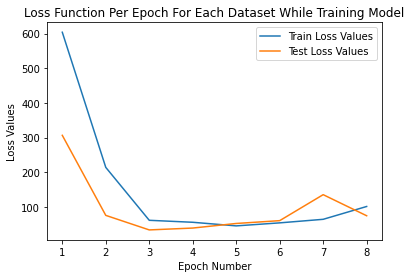

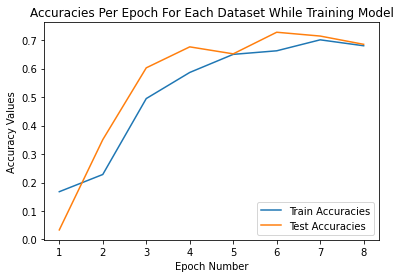


Evaluating Testing Performance:


2it [00:12,  6.48s/it]



Confusion Matrix:
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 1, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Testing Accuracy -> 0.68 Testing Precision -> 0.54 Testing Recall -> 0.56 Testing F1-Score -> 0.55

*****************************************

Existing model not found, therefore training a new model...

Current Model Settings:
Epoch Number: 32 - Learning Rate: 0.01 - Batch Size: 32 - Fine

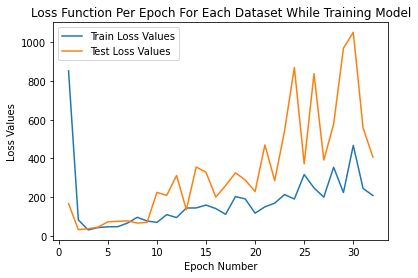

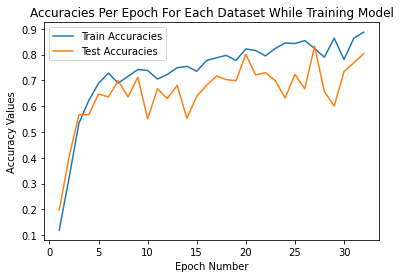


Evaluating Testing Performance:


2it [00:12,  6.45s/it]



Confusion Matrix:
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
[0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 6, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Testing Accuracy -> 0.75 Testing Precision -> 0.66 Testing Recall -> 0.66 Testing F1-Score -> 0.66

*****************************************

Existing model not found, therefore training a new model...

Current Model Settings:
Epoch Number: 64 - Learning Rate: 0.01 - Batch Size: 32 - Fine

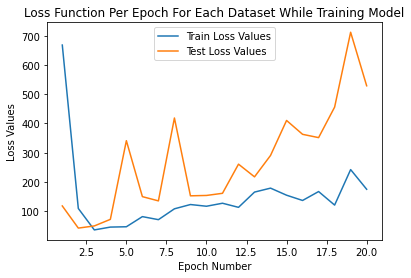

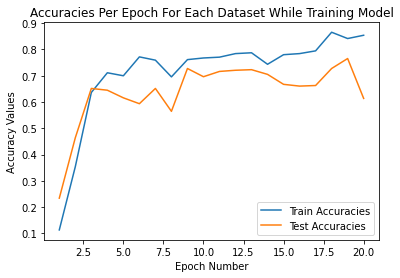


Evaluating Testing Performance:


2it [00:15,  7.72s/it]



Confusion Matrix:
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 4, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 2]
[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[1, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

Testing Accuracy -> 0.67 Testing Precision -> 0.76 Testing Recall -> 0.73 Testing F1-Score -> 0.74

*****************************************



In [ ]:
# Step-1: Defining required and important constants
willUseSubset = True 
SUBSET_NUMBER = 300
batch_size_list = ([32])
epoch_number_list = ([8, 32, 64])
learning_rate_list = ([0.01])
finetune_option_list = (["FinetuneAll"])
isFinalModel = False

# Step-2: Make experiment and store results
experiment_with_vgg19(willUseSubset, SUBSET_NUMBER, willEarlyStop, validationPercentage, testPercentage, numberOfClasses, batch_size_list, epoch_number_list, learning_rate_list, finetune_option_list, isFinalModel)

###**Experiment Results & Literature Review:**

*   If the number of epochs used for training is more than necessary, model learns patterns that are specific to sample data to a great extent. This situation causes overfitting since model loses generalization capacity.
*   If the number of epochs used for trainins is less than necessary, model doesn't learn required patterns to the dataset. And this situation causes underfitting.
*   On the other hand, thats why i implemented a early stopping method, which tests validation accuracy in 10 each epochs.
*   According to our previous experiments, 32 is ideal epoch number between 8, 16, 32 and 64.

<a name="cell-id-243"></a>
###**Part-2.4.3: Effect Of Learning Rate (Experiment 3)**
*   Data Length: 300 Samples
*   Image Size: 128x128 Pixels
*   Batch Size: 32
*   Epoch Number: 16
*   **Learning Rate: 0.005, 0.01, 0.02** ('0.01' has already done at part-1, therefore i skip it!)
*   Finetune Option: All




Existing model not found, therefore training a new model...

Current Model Settings:
Epoch Number: 16 - Learning Rate: 0.005 - Batch Size: 32 - Finetune Option: FinetuneAll

Model Training Process:
Epoch: 1, Train Loss: 170.92, Accuracy: 0.13, Execution Time: 54.30 sec.
Epoch: 1, Test Loss: 161.56, Accuracy: 0.13, Execution Time: 14.34 sec.
Epoch: 2, Train Loss: 60.72, Accuracy: 0.16, Execution Time: 56.75 sec.
Epoch: 2, Test Loss: 44.24, Accuracy: 0.20, Execution Time: 14.36 sec.
Epoch: 3, Train Loss: 23.41, Accuracy: 0.29, Execution Time: 52.93 sec.
Epoch: 3, Test Loss: 23.37, Accuracy: 0.31, Execution Time: 14.46 sec.
Epoch: 4, Train Loss: 11.16, Accuracy: 0.52, Execution Time: 53.18 sec.
Epoch: 4, Test Loss: 17.98, Accuracy: 0.52, Execution Time: 18.70 sec.
Epoch: 5, Train Loss: 13.06, Accuracy: 0.69, Execution Time: 53.13 sec.
Epoch: 5, Test Loss: 17.12, Accuracy: 0.62, Execution Time: 14.47 sec.
Epoch: 6, Train Loss: 10.96, Accuracy: 0.70, Execution Time: 55.07 sec.
Epoch: 6, Tes

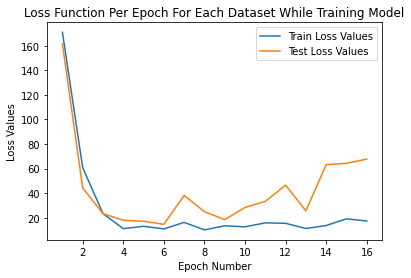

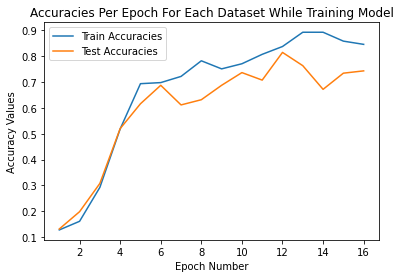


Evaluating Testing Performance:


2it [00:14,  7.21s/it]



Confusion Matrix:
[1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0]
[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]

Testing Accuracy -> 0.73 Testing Precision -> 0.79 Testing Recall -> 0.74 Testing F1-Score -> 0.76

*****************************************

Existing model not found, therefore training a new model...

Current Model Settings:
Epoch Number: 16 - Learning Rate: 0.02 - Batch Size: 32 - Fine

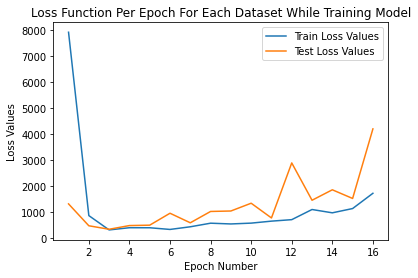

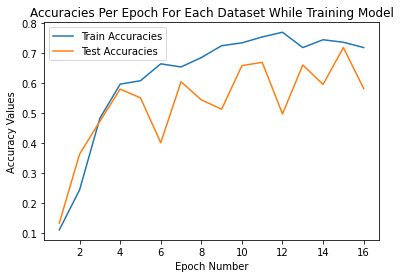


Evaluating Testing Performance:


2it [00:14,  7.21s/it]



Confusion Matrix:
[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
[0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
[2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]

Testing Accuracy -> 0.63 Testing Precision -> 0.72 Testing Recall -> 0.66 Testing F1-Score -> 0.69

*****************************************



In [ ]:
# Step-1: Defining required and important constants
willUseSubset = True 
SUBSET_NUMBER = 300
batch_size_list = ([32])
epoch_number_list = ([16])
learning_rate_list = ([0.005, 0.02])
finetune_option_list = (["FinetuneAll"])
isFinalModel = False

# Step-2: Make experiment and store results
experiment_with_vgg19(willUseSubset, SUBSET_NUMBER, willEarlyStop, validationPercentage, testPercentage, numberOfClasses, batch_size_list, epoch_number_list, learning_rate_list, finetune_option_list, isFinalModel)

###**Experiment Results & Literature Review:**

*   The amount that the weights are updated during training is referred to as the step size or the learning rate.
*   Ideal learning rate is adaptive. A learning rate that is too small can cause the process to get stuck.
*   A learning rate that is too large can cause the model to converge too quickly to a suboptimal solution.
*   A great graph about loss-epoch exchange due to learning rate can be found in reference of. [1]
*   According to our previous experiments, X.XX is ideal epoch number between 0.05, 0.01 and 0.02.

[Reference-1] -> https://miro.medium.com/max/640/0*C5kIkoBwht0fXRgs.webp

<a name="cell-id-244"></a>
###**Part-2.4.4: Effect Of Finetune Option (Experiment 4)**
*   Data Length: 300 Samples
*   Image Size: 128x128 Pixels
*   Batch Size: 32
*   Epoch Number: 16
*   Learning Rate: 0.01
*   **Finetune Option: Only Last Two, All** ('All' has already done at part-1, therefore i skip it!)





Existing model not found, therefore training a new model...

Current Model Settings:
Epoch Number: 16 - Learning Rate: 0.01 - Batch Size: 32 - Finetune Option: FinetuneOnlyLastTwo

Model Training Process:
Epoch: 1, Train Loss: 303552600213.47, Accuracy: 0.06, Execution Time: 154.15 sec.
Epoch: 1, Test Loss: 159917.60, Accuracy: 0.05, Execution Time: 14.81 sec.
Epoch: 2, Train Loss: 2790126.64, Accuracy: 0.09, Execution Time: 158.72 sec.
Epoch: 2, Test Loss: 592428.38, Accuracy: 0.05, Execution Time: 14.82 sec.
Epoch: 3, Train Loss: 18246917.17, Accuracy: 0.04, Execution Time: 157.25 sec.
Epoch: 3, Test Loss: 2324904.00, Accuracy: 0.07, Execution Time: 14.34 sec.
Epoch: 4, Train Loss: 106911656.92, Accuracy: 0.04, Execution Time: 149.83 sec.
Epoch: 4, Test Loss: 212615.21, Accuracy: 0.03, Execution Time: 15.03 sec.
Epoch: 5, Train Loss: 121620074.57, Accuracy: 0.04, Execution Time: 145.98 sec.
Epoch: 5, Test Loss: 2441916.88, Accuracy: 0.03, Execution Time: 14.44 sec.
Epoch: 6, Train Lo

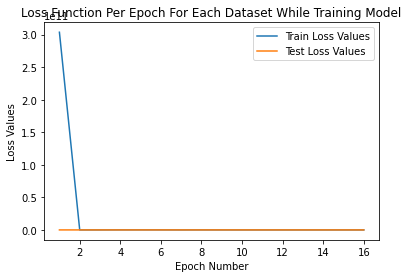

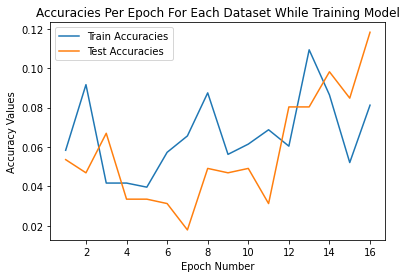


Evaluating Testing Performance:


2it [00:15,  7.51s/it]



Confusion Matrix:
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0]
[0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0]
[0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0]
[0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0]
[0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Testing Accuracy -> 0.08 Testing Precision -> 0.03 Testing Recall -> 0.09 Testing F1-Score -> 0.04

*****************************************



In [ ]:
# Step-1: Defining required and important constants
willUseSubset = True 
SUBSET_NUMBER = 300
batch_size_list = ([32])
epoch_number_list = ([16])
learning_rate_list = ([0.01])
finetune_option_list = (["FinetuneOnlyLastTwo"])
isFinalModel = False

# Step-2: Make experiment and store results
experiment_with_vgg19(willUseSubset, SUBSET_NUMBER, willEarlyStop, validationPercentage, testPercentage, numberOfClasses, batch_size_list, epoch_number_list, learning_rate_list, finetune_option_list, isFinalModel)

###**Experiment Results & Literature Review:**

*   Fine-tuning is a way of applying or utilizing transfer learning. Specifically, fine-tuning is a process that takes a model that has already been trained for one given task and then tunes or tweaks the model to make it perform a second similar task.
*   Fine-tuning reduces training time dramatically since models first layers become effective by using pre-trained weights.
*   Fine-tuning improves performance especially on large scale datasets since pre-trained datasets are usually used.
*   Fine-tuning counter over-fitting on small datasets because pre-trained filters prevent small datasets low level filters.
*   On the other hand, fine-tuning has several disadvantages. First of all there is no guarantee that the initialization point of the weights is a good starting point; they could be stuck in a local minimum. Also with using pre-trained models, actually we are using exactly the same architecture which might not be desirable. 

**References:**
1.  Finetuning In Pytorch, Reference For Coding Part
(https://discuss.pytorch.org/t/how-to-perform-finetuning-in-pytorch/419/51?page=3)

2.  Advantages and Disadvantages of Fine-Tuning, Reference For Report Part (https://stats.stackexchange.com/questions/363996/when-we-need-fine-tuning-of-cnn)

<a name="cell-id-25"></a>
##**Part-2.5: VGG-19 CNN Experiment Results As A Table**

In this part, we will visualize our settings and results from part 2.4 in order to find best settings.

**Important Note:** If you want to see results without having any troubles, all of experiments in part 2.4 should be done sequentially (in other words without having any repatitions or without having any crashes).

In [ ]:
# It's a dynamic table generator for Python, with using data from previous experiments at part 2.4
col_names = ['Data Size', 'Batch Size', 'Epoch Number', 'Learning Rate', 'Finetune Option', 'Is Early Stopped?', 'Training Accuracy', 'Testing Accuracy']
result_df = pd.DataFrame(test_results_df, columns=col_names)
print(result_df.to_string())

   Data Size  Batch Size  Epoch Number  Learning Rate      Finetune Option  Is Early Stopped? Training Accuracy Testing Accuracy
0        300          16            16          0.010          FinetuneAll              False              0.71             0.73
1        300          32            16          0.010          FinetuneAll              False              0.86             0.69
2        300          64            16          0.010          FinetuneAll              False              0.87             0.63
3        300         128            16          0.010          FinetuneAll              False              0.84             0.87
4        300          32             8          0.010          FinetuneAll              False              0.68             0.68
5        300          32            32          0.010          FinetuneAll              False              0.89             0.75
6        300          32            64          0.010          FinetuneAll               True    

<a name="cell-id-26"></a>
##**Part-2.6: Using Best VGG-19 Model Options With All Data (Parameter Tuning)**

Best parameters for VGG-19 model, according to experiment results from part 2.5 are:
*   Ideal Batch Size -> 128
*   Ideal Learning Rate -> 0.05
*   Ideal Finetune Option -> FinetuneAll
*   Ideal Epoch Number -> 32

Existing model not found, therefore training a new model...

Current Model Settings:
Epoch Number: 3 - Learning Rate: 0.005 - Batch Size: 128 - Finetune Option: FinetuneAll

Model Training Process:
Epoch: 1, Train Loss: 12.13, Accuracy: 0.76, Execution Time: 3771.70 sec.
Epoch: 1, Test Loss: 3.35, Accuracy: 0.83, Execution Time: 716.02 sec.
Epoch: 2, Train Loss: 3.88, Accuracy: 0.83, Execution Time: 3751.81 sec.
Epoch: 2, Test Loss: 3.40, Accuracy: 0.81, Execution Time: 725.95 sec.
Epoch: 3, Train Loss: 2.70, Accuracy: 0.83, Execution Time: 3745.37 sec.
Epoch: 3, Test Loss: 2.29, Accuracy: 0.83, Execution Time: 714.14 sec.

Evaluating Training Performance:


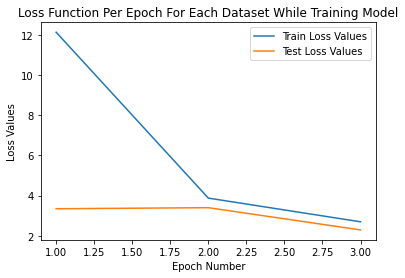

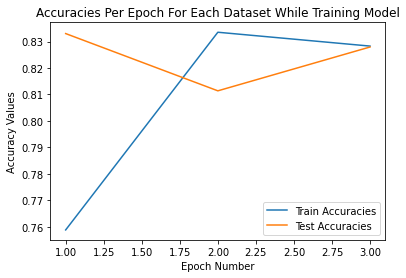


Evaluating Testing Performance:


24it [12:07, 30.33s/it]



Confusion Matrix:
[127, 4, 0, 4, 11, 4, 4, 5, 3, 10, 13, 1, 1, 4, 9]
[7, 182, 0, 1, 4, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0]
[3, 1, 170, 5, 3, 0, 0, 2, 0, 7, 6, 0, 0, 0, 3]
[13, 1, 3, 91, 1, 1, 6, 0, 0, 22, 53, 4, 1, 2, 2]
[2, 6, 0, 1, 180, 0, 0, 0, 7, 0, 0, 2, 1, 0, 1]
[2, 1, 0, 1, 2, 184, 0, 0, 3, 0, 5, 0, 0, 1, 1]
[1, 1, 1, 7, 1, 0, 168, 2, 0, 7, 10, 0, 0, 1, 1]
[1, 1, 0, 2, 0, 0, 2, 187, 2, 2, 1, 0, 0, 2, 0]
[2, 2, 0, 0, 2, 1, 0, 0, 189, 1, 1, 0, 1, 1, 0]
[11, 4, 1, 10, 2, 0, 4, 0, 0, 135, 27, 1, 1, 3, 1]
[8, 1, 0, 28, 1, 2, 9, 2, 0, 14, 130, 0, 0, 2, 3]
[1, 0, 0, 2, 0, 0, 1, 5, 2, 0, 0, 182, 0, 3, 4]
[2, 0, 0, 5, 2, 3, 0, 0, 0, 1, 0, 8, 179, 0, 0]
[5, 0, 0, 0, 6, 0, 0, 2, 3, 0, 0, 0, 0, 183, 1]
[3, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 193]

Testing Accuracy -> 0.83 Testing Precision -> 0.83 Testing Recall -> 0.83 Testing F1-Score -> 0.83

*****************************************



In [ ]:
# Step-1: Defining required and important constants
willUseSubset = False 
SUBSET_NUMBER = 21000 # Since willUseSubset is false, no matter what writes here
batch_size_list = ([128])
epoch_number_list = ([3])
learning_rate_list = ([0.005])
finetune_option_list = (["FinetuneAll"])
isFinalModel = True

# Step-2: Make experiment and store results
experiment_with_vgg19(willUseSubset, SUBSET_NUMBER, willEarlyStop, validationPercentage, testPercentage, numberOfClasses, batch_size_list, epoch_number_list, learning_rate_list, finetune_option_list, isFinalModel)

**Important Note-1:** I tried different settings with that using all dataset and this combination gave best results.

**Important Note-2:** But since data size is big and my computation power is limited, i limited epoch as 3. Because with using whole dataset, computation of 3 epochs takes 4-5 hours. Therefore it's best i can do with that hardware and time limitations. But according to results since dataset includes 21k samples, model trained well in just 3 epochs.

**Important Note-3:** I tried to execute with 8 epoch but COLAB crashed after 5 epochs due to a worktime limit error. :( Results of that experiment are:

* Epoch: 1, Train Loss: 12.98, Accuracy: 0.76, Execution Time: 3259.42 sec.
* Epoch: 1, Test Loss: 2.11, Accuracy: 0.87, Execution Time: 605.09 sec.
* Epoch: 2, Train Loss: 3.51, Accuracy: 0.86, Execution Time: 3374.46 sec.
* Epoch: 2, Test Loss: 5.66, Accuracy: 0.88, Execution Time: 633.31 sec.
* Epoch: 3, Train Loss: 6.32, Accuracy: 0.87, Execution Time: 3493.09 sec.
* Epoch: 3, Test Loss: 5.13, Accuracy: 0.87, Execution Time: 634.18 sec.
* Epoch: 4, Train Loss: 5.30, Accuracy: 0.88, Execution Time: 3429.48 sec.
* Epoch: 4, Test Loss: 5.10, Accuracy: 0.90, Execution Time: 649.65 sec.
* Epoch: 5, Train Loss: 5.44, Accuracy: 0.89, Execution Time: 3498.96 sec.
* Epoch: 5, Test Loss: 5.75, Accuracy: 0.91, Execution Time: 626.63 sec.
* (Google Colab Worktime Limit Crash At Epoch 6)

<a name="cell-id-27"></a>
##**Part-2.7: Visualization of Layers of Best VGG-19 Model**
Unfortunately not supported...